In [1]:
from one.api import ONE
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from brainbox.singlecell import bin_spikes
from iblatlas.atlas import AllenAtlas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.multitest import multipletests
import seaborn as sns

C:\Users\elsha\anaconda3\envs\ibl\Lib\site-packages\one\alf\files.py:10: FutureWarning: `one.alf.files` will be removed in version 3.0. Use `one.alf.path` instead.
  warnings.warn(


In [2]:
ba = AllenAtlas()
one = ONE()

In [3]:
p_motor_regions = []
sessions_with_regions = one.search_insertions(atlas_acronym= ['MOp'], project='brainwide')
for session in sessions_with_regions:
    p_motor_regions.append(session)

In [4]:
s_motor_regions = []
sessions_with_regions = one.search_insertions(atlas_acronym= ['MOs'], project='brainwide')
for session in sessions_with_regions:
    s_motor_regions.append(session)

In [5]:
sc_regions= []
sessions_with_regions = one.search_insertions(atlas_acronym= ['SCdg'], project='brainwide')
for session in sessions_with_regions:
    sc_regions.append(session)

In [6]:
striatum_regions = []
sessions_with_regions = one.search_insertions(atlas_acronym= ['STR'], project='brainwide')
for session in sessions_with_regions:
    striatum_regions.append(session)

In [7]:
striatum_regions

['e5bd461c-a713-4b3c-b165-a132a711e59d',
 '32e30a72-5f18-4aff-81c3-4553531b2d75',
 '9866c08f-acce-4291-b94d-d9835e62f835',
 'fd6d686b-eae1-44cb-adbb-159c69c85827',
 '379105fd-dbb1-40d9-8a51-ae5a8ef8df04',
 'c44adf4f-3d1c-491f-88e4-c516cc910bd8',
 '5bfcf68f-4e0b-46f8-a9e3-8e919d5ddd1c',
 'd3deaed9-34b7-41da-bd62-961750cb9ca0',
 'c1014051-d06b-4f85-9887-e7c42a94baf2',
 'a464fc97-1391-4bbe-9aef-73a79975d27f',
 '310c60b6-d68f-4018-a86a-3668ce296837',
 '06cb2ee3-0fb8-4ace-acbe-19c716f3ca40',
 '1ab86a7f-578b-4a46-9c9c-df3be97abcca',
 '5e8ac11b-959a-49ab-a6a3-8a3397e1df0e',
 'e92f8734-2c06-4168-9271-d00b3bf57c02',
 'd23dec01-b35e-4950-9afa-72a1b3e74148',
 '83716e49-3026-41a3-b021-1a4b6362f433',
 '4279e354-a6b8-4eff-8245-7c8723b07834',
 '507b20cf-4ab0-4f55-9a81-88b02839d127',
 '6ad5a0a6-362a-4aec-8743-2e91469b0b62',
 '7c94d733-b913-4064-83f2-37422712204c',
 'e05af01e-8721-4ec7-8d0f-dc022b3bebc3',
 'c872ca65-8319-4901-856e-7dc507e2dd9c',
 '6358854e-51d2-47de-a278-5cbfd155feb6',
 '1878c999-d523-

3 sessions of each combination, fix alpha lvl bonferroni fdr correction, contrast graph

frontal orienting field, posterior parietal cortex, anterior dorsal striatum, dorsal frontal precortex, Retrosplenial cortex RSPv#

BLAa, BLAv, RT, LP, LGd-co, ORBvl, MOp, MOs, SCig, SCdg, SCiw

In [8]:
sessions_with_regions = one.search_insertions(atlas_acronym= ['STR', 'MO'], project='brainwide')
for session in sessions_with_regions:
    print(session)

In [9]:
pid_matrix = pd.DataFrame(columns = ['Primary Motor Cortex (MOp)', 'Secondary Motor Cortex (MOs)', 
                                     'Superior Collicilus (SC)', 'Striatum (STR)'])
pid_matrix['Primary Motor Cortex (MOp)'] = ['73ff4936-8cd3-4a75-a772-f563e67d249d', 'f475ae14-9415-453e-b800-1480ea1c868d', 
                                            '7b05cccc-44f6-4491-a0ea-e38d6e95513d', 'decc8d40-cf74-4263-ae9d-a0cc68b47e86',
                                           '2564dc27-4eda-4fc3-a151-c13475796ee1', 'df07180e-268e-489c-826e-40cb6f63d3a5',
                                           '2d2cdf86-4a0c-42d8-aed3-5b187f160013', '79628a45-c2e3-4206-97df-4c91edaff90f',
                                           '7bd5627e-b02e-47f1-b476-4bf8eaa726b3', '3bd1f88b-4e0c-43a6-9483-3305e82f2fae']

pid_matrix['Secondary Motor Cortex (MOs)'] = ['298e2a70-9801-45f0-b91c-d6bb9718427e', '99993a2b-588e-4c0c-bfec-e3dfb4f61534',
                                             '450cea3b-9289-4708-9df2-a2518bdc4b59', '2564dc27-4eda-4fc3-a151-c13475796ee1',
                                             'ae2b9f1b-ebe3-4b56-8957-31982186e6ec', '5458cb27-d065-4626-bcd8-1aa775e1115e',
                                             '26af22bb-b295-4a45-8ed3-1700604c0708', '45e7731f-4a43-45d5-9029-c080150bc596',
                                             '898f8971-31e9-4fdb-b66e-2ae6d3a33a5b', 'c1014051-d06b-4f85-9887-e7c42a94baf2']

pid_matrix['Superior Collicilus (SC)'] = ['c893c0a3-5597-49cf-baa1-60efdfdef542', 'b7c57ce1-a75b-410a-94b6-8abee5a92c4f',
                                         'e7080659-8319-48a6-b6fd-2e8ce8eeec49', 'fe41986d-4966-4a77-af7e-e7f71c25aec5',
                                         '00a824c0-e060-495f-9ebc-79c82fef4c67', '7791ee46-5c13-4d1b-8518-5602dcb8666b',
                                         '53ecbf4f-e0d8-4fe6-a852-8b934a37a1c2', '9150758e-1390-41d1-b426-96675e60dbea',
                                         'ca5404f7-297c-40f1-bbf0-5ac0a63e24f8', 'e4ce2e94-6fb9-4afe-acbf-6f5a3498602e']

pid_matrix['Striatum (STR)'] = ['73ff4936-8cd3-4a75-a772-f563e67d249d', 'f475ae14-9415-453e-b800-1480ea1c868d',
                                'c4b5a9fa-10cb-4195-9c17-15b6a1f77f9a', '45c49ba2-a113-4446-9c6d-9b049c1f9f74',
                               'fd555d39-b728-44aa-90d2-796b8bb58300', '45e7731f-4a43-45d5-9029-c080150bc596',
                               '6a22a5b4-79ec-4b3c-b023-1ec7b4a2b675', 'adca9242-0725-41d4-8eb1-5655a464431d',
                               '19c9caea-2df8-4097-92f8-0a2bad055948', 'd3deaed9-34b7-41da-bd62-961750cb9ca0']

In [10]:
pid_matrix

Primary Motor Cortex (MOp)          Secondary Motor Cortex (MOs)  \
0  73ff4936-8cd3-4a75-a772-f563e67d249d  298e2a70-9801-45f0-b91c-d6bb9718427e   
1  f475ae14-9415-453e-b800-1480ea1c868d  99993a2b-588e-4c0c-bfec-e3dfb4f61534   
2  7b05cccc-44f6-4491-a0ea-e38d6e95513d  450cea3b-9289-4708-9df2-a2518bdc4b59   
3  decc8d40-cf74-4263-ae9d-a0cc68b47e86  2564dc27-4eda-4fc3-a151-c13475796ee1   
4  2564dc27-4eda-4fc3-a151-c13475796ee1  ae2b9f1b-ebe3-4b56-8957-31982186e6ec   
5  df07180e-268e-489c-826e-40cb6f63d3a5  5458cb27-d065-4626-bcd8-1aa775e1115e   
6  2d2cdf86-4a0c-42d8-aed3-5b187f160013  26af22bb-b295-4a45-8ed3-1700604c0708   
7  79628a45-c2e3-4206-97df-4c91edaff90f  45e7731f-4a43-45d5-9029-c080150bc596   
8  7bd5627e-b02e-47f1-b476-4bf8eaa726b3  898f8971-31e9-4fdb-b66e-2ae6d3a33a5b   
9  3bd1f88b-4e0c-43a6-9483-3305e82f2fae  c1014051-d06b-4f85-9887-e7c42a94baf2   

               Superior Collicilus (SC)                        Striatum (STR)  
0  c893c0a3-5597-49cf-baa1-60efdfdef542  73ff4936-8cd3-4a75-a772-f563e67d249d  
1  b7c57ce1-a75b-410a-94b6-8abee5a92c4f  f475ae14-9415-453e-b800-1480ea1c868d  
2  e7080659-8319-48a6-b6fd-2e8ce8eeec49  c4b5a9fa-10cb-4195-9c17-15b6a1f77f9a  
3  fe41986d-4966-4a77-af7e-e7f71c25aec5  45c49ba2-a113-4446-9c6d-9b049c1f9f74  
4  00a824c0-e060-495f-9ebc-79c82fef4c67  fd555d39-b728-44aa-90d2-796b8bb58300  
5  7791ee46-5c13-4d1b-8518-5602dcb8666b  45e7731f-4a43-45d5-9029-c080150bc596  
6  53ecbf4f-e0d8-4fe6-a852-8b934a37a1c2  6a22a5b4-79ec-4b3c-b023-1ec7b4a2b675  
7  9150758e-1390-41d1-b426-96675e60dbea  adca9242-0725-41d4-8eb1-5655a464431d  
8  ca5404f7-297c-40f1-bbf0-5ac0a63e24f8  19c9caea-2df8-4097-92f8-0a2bad055948  
9  e4ce2e94-6fb9-4afe-acbf-6f5a3498602e  d3deaed9-34b7-41da-bd62-961750cb9ca0

In [11]:
pid = pid_matrix['Primary Motor Cortex (MOp)'][0]
eid, _ = one.pid2eid(pid)
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

C:\Users\elsha\anaconda3\envs\ibl\Lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
C:\Users\elsha\anaconda3\envs\ibl\Lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


Handpick sessions from different brain regions (Superior Colliculus, Primary/Secondary motor, Striatum).
Create loop that goes through each cluster in both probes
Use cluster to align event across trials and create PSTH 
Find clusters and sessions that match the PSTHs that show sensitive clusters (depending on different events[stim onset, movement onset, reward])

In [12]:
bin_size = 0.1
pre_time = 2
post_time = 3
stimulus_events = np.array(sl.trials['stimOn_times'])
movement_events = np.array(sl.trials['firstMovement_times'])
reward_events = np.array(sl.trials['feedback_times'])

In [13]:
session_region_acronym = clusters['acronym'].astype(str)
cluster_ids = np.where(clusters['label'] == 1 & np.char.startswith(session_region_acronym, 'MOp'))[0]
cluster_ids

array([ 11,  69, 147, 163, 172, 177, 178, 196, 206, 257])

In [14]:
sl.trials

stimOff_times  goCueTrigger_times  feedbackType  contrastLeft  \
0              NaN          111.623602           1.0        1.0000   
1       115.797472          114.398219           1.0           NaN   
2       118.514379          117.190416           1.0        0.2500   
3       121.589942          119.956947           1.0           NaN   
4       125.489958          123.031493          -1.0        0.0000   
..             ...                 ...           ...           ...   
667            NaN         3121.426971           1.0        0.0625   
668            NaN         3127.584630           1.0        0.2500   
669            NaN         3132.226498           1.0        0.1250   
670            NaN         3136.283671           1.0        1.0000   
671            NaN         3142.193031           1.0        0.1250   

     contrastRight  rewardVolume  goCue_times  choice  feedback_times  \
0              NaN           1.5          NaN     1.0             NaN   
1            0.125           1.5   114.398939    -1.0      114.721404   
2              NaN           1.5   117.191205     1.0      117.441190   
3            1.000           1.5   119.957936    -1.0      120.523282   
4              NaN           0.0   123.032252    -1.0      123.423166   
..             ...           ...          ...     ...             ...   
667            NaN           1.5          NaN     1.0             NaN   
668            NaN           1.5          NaN     1.0             NaN   
669            NaN           1.5          NaN     1.0             NaN   
670            NaN           1.5          NaN     1.0             NaN   
671            NaN           1.5          NaN     1.0             NaN   

     stimOn_times  response_times  firstMovement_times  probabilityLeft  \
0             NaN      111.921005                  NaN              0.5   
1      114.398075      114.721318           114.485784              0.5   
2      117.190245      117.441119           117.349784              0.5   
3      119.956784      120.523155           120.108784              0.5   
4      123.031292      123.422297           123.194784              0.5   
..            ...             ...                  ...              ...   
667           NaN     3124.197552                  NaN              0.8   
668           NaN     3127.877028                  NaN              0.8   
669           NaN     3132.487497                  NaN              0.8   
670           NaN     3136.625869                  NaN              0.8   
671           NaN     3142.442730                  NaN              0.8   

     intervals_0  intervals_1  
0     111.121198   113.490319  
1     113.919321   116.297516  
2     116.682211   119.014437  
3     119.403438   122.090083  
4     122.484186   125.990031  
..           ...          ...  
667  3120.611276  3125.743344  
668  3126.856534  3129.434120  
669  3130.527310  3134.059889  
670  3135.149479  3138.199960  
671  3139.321551  3144.017422  

[672 rows x 15 columns]

cluster #11


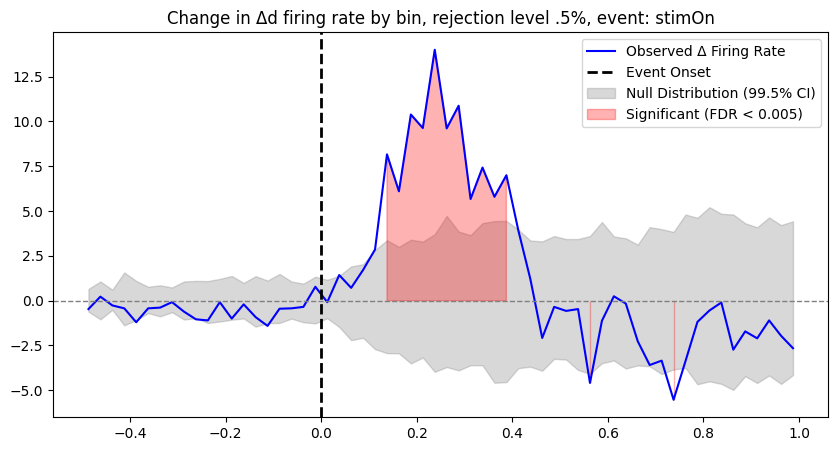

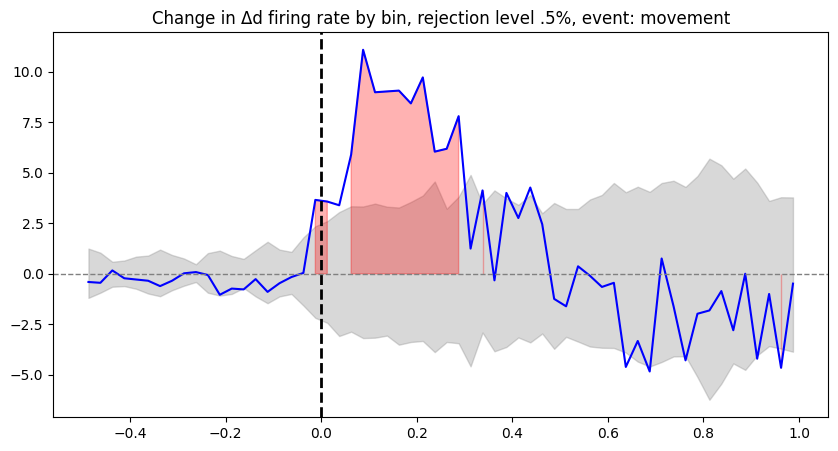

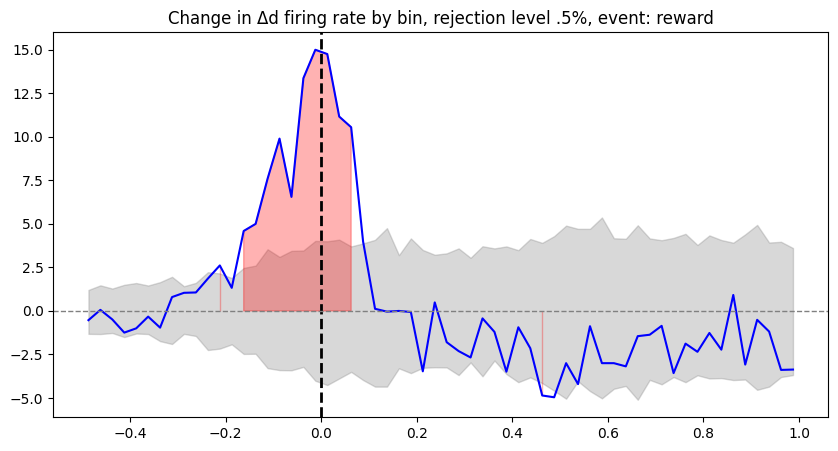

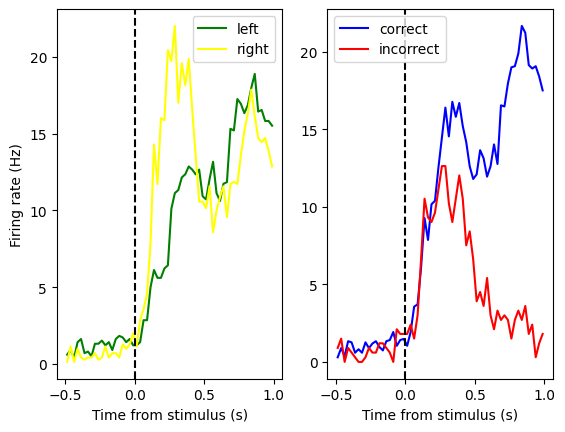

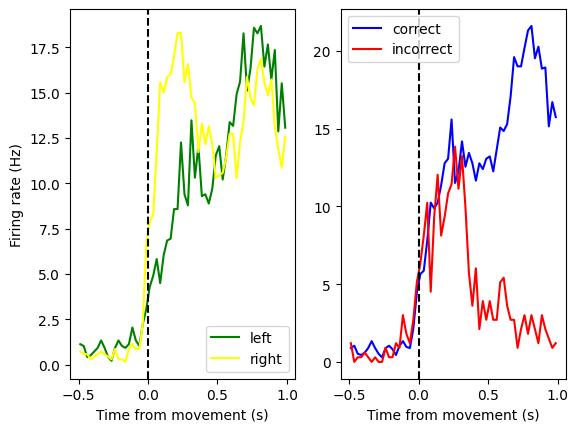

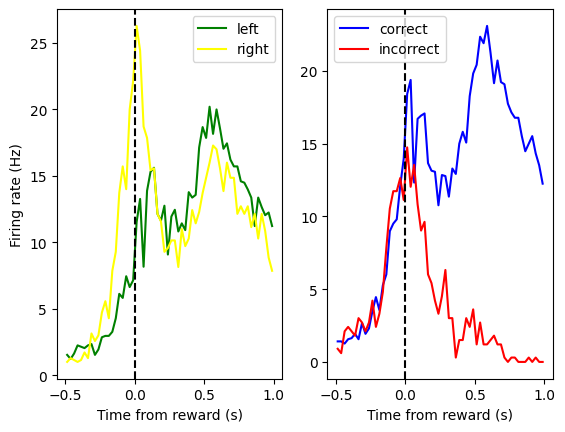

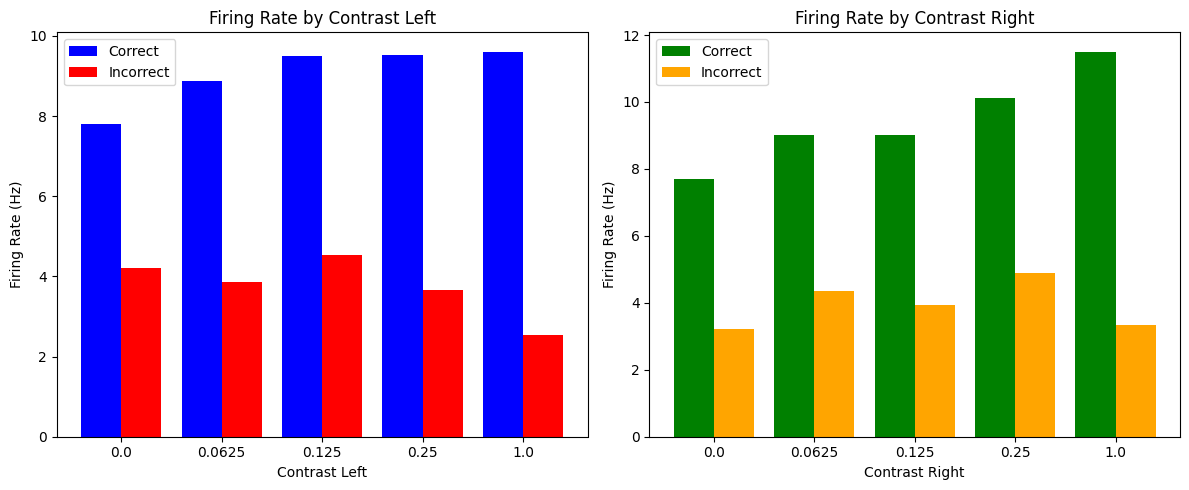

cluster #69


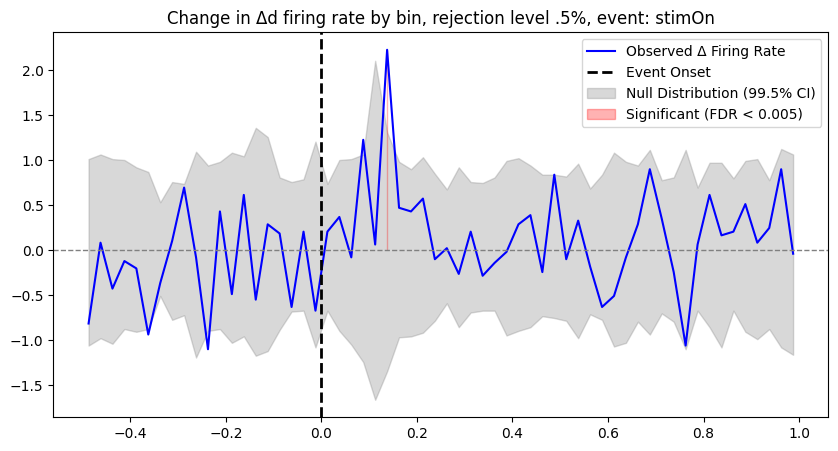

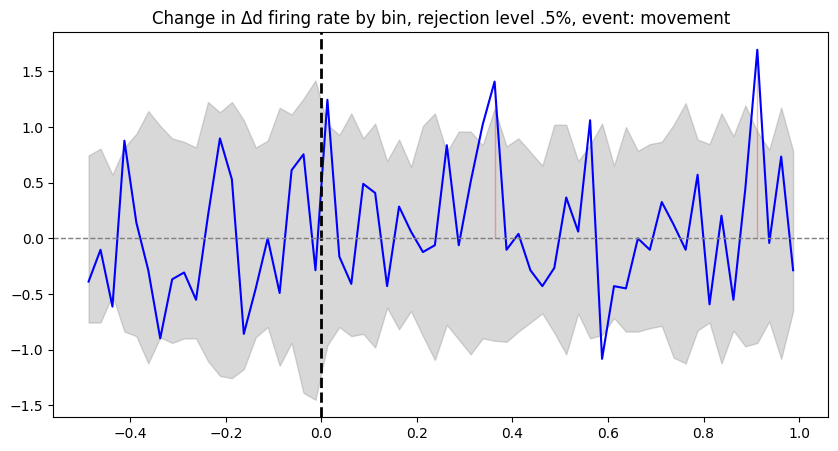

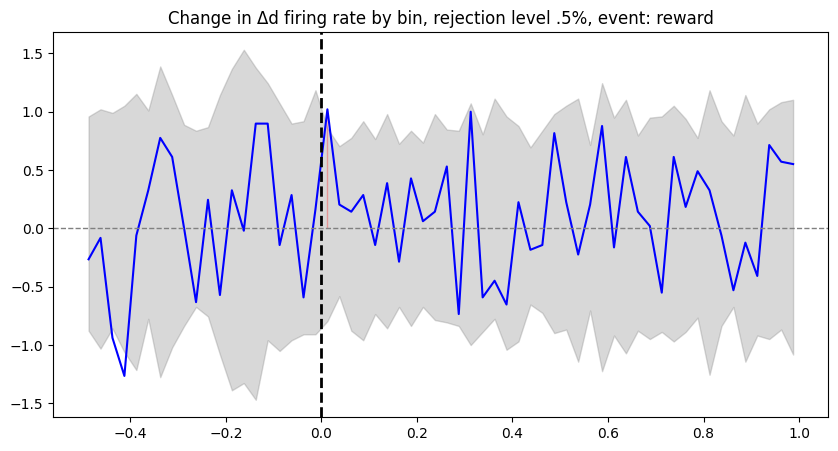

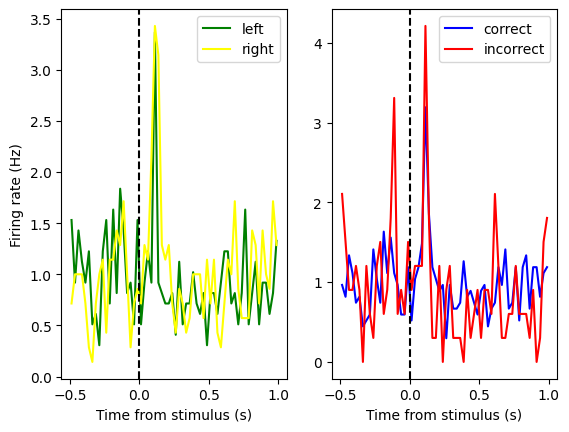

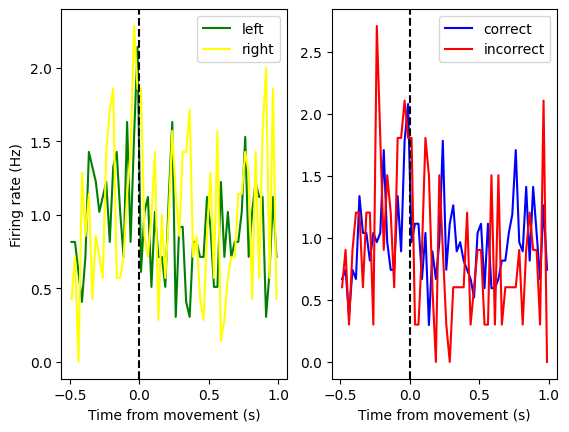

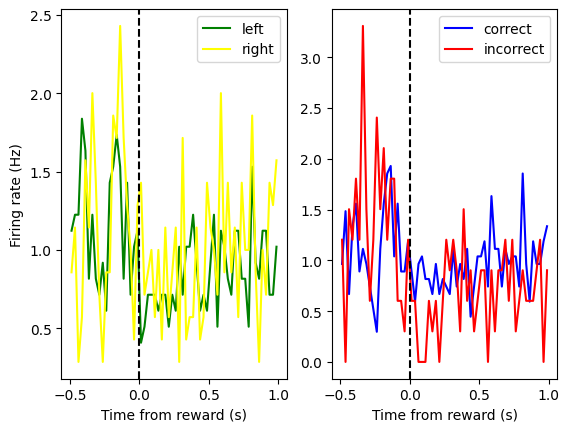

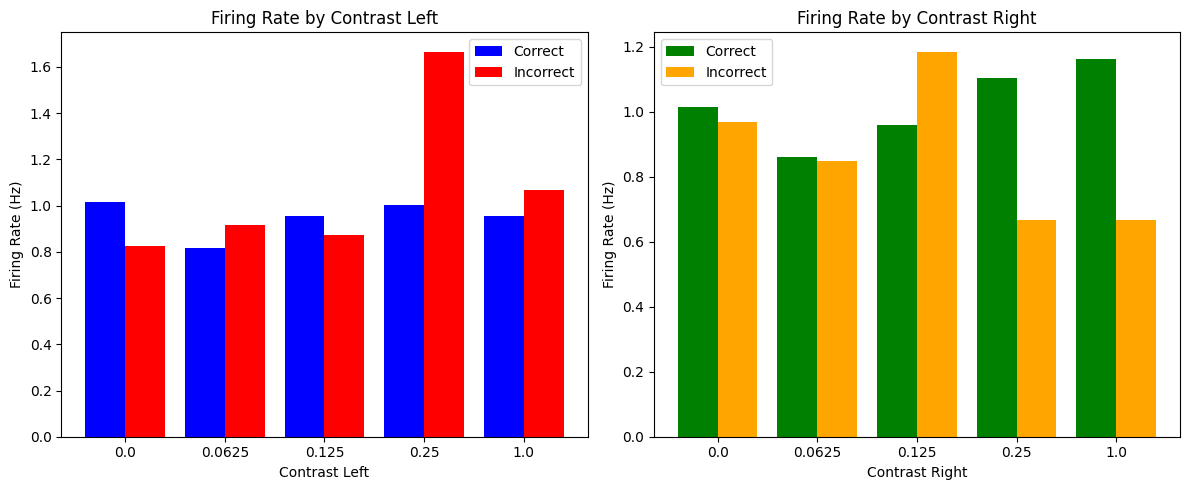

cluster #147


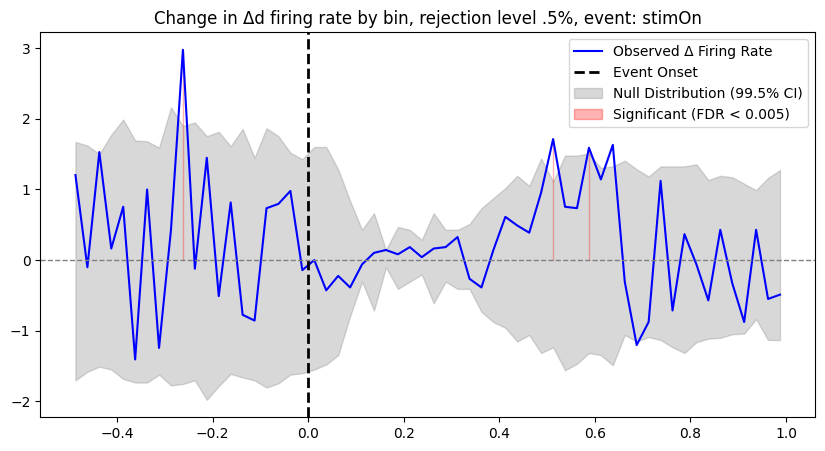

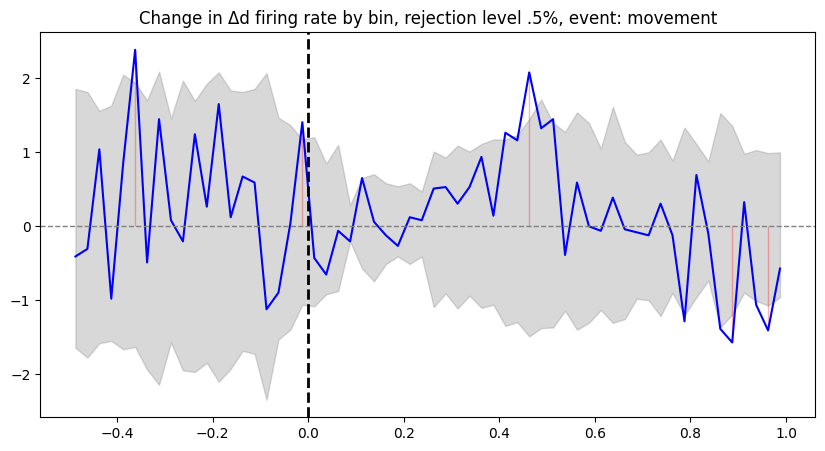

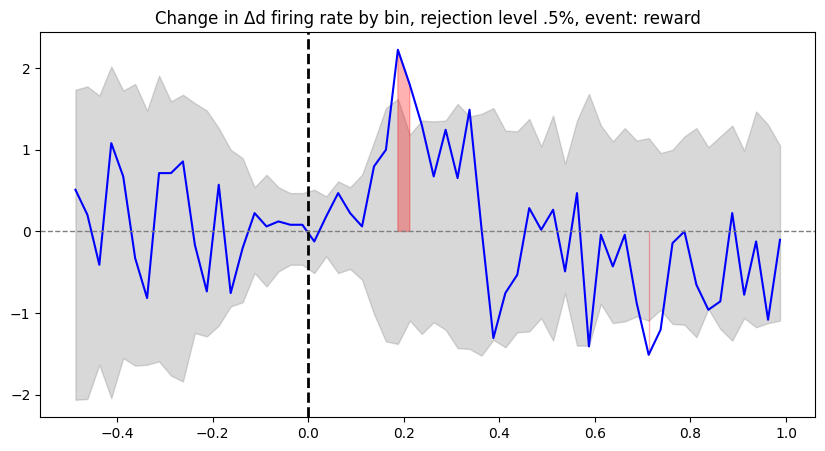

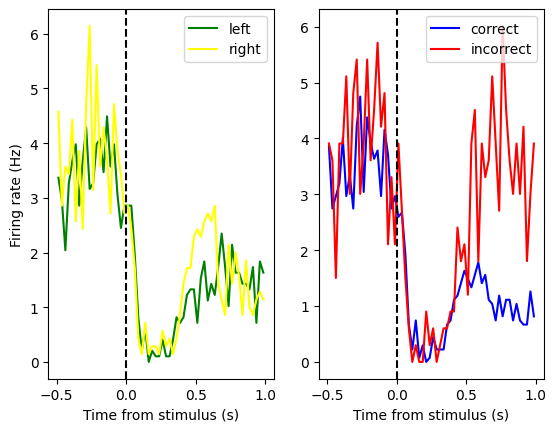

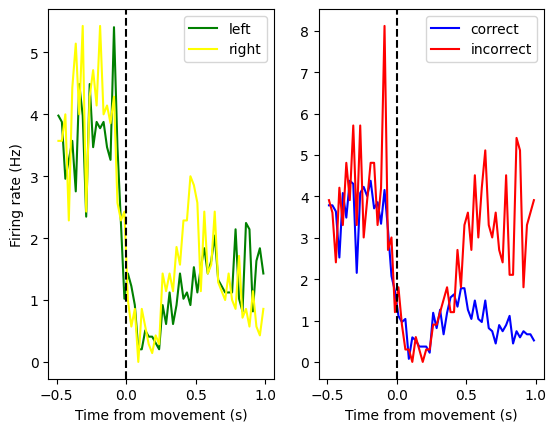

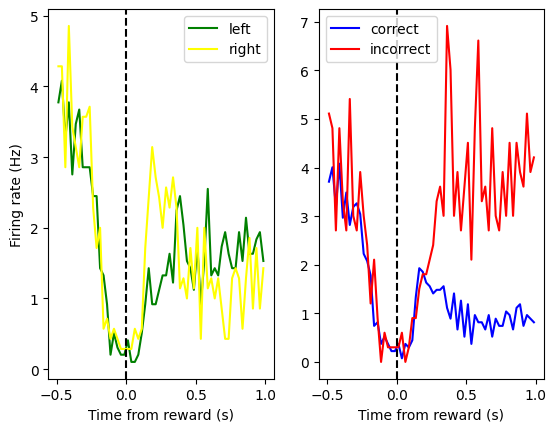

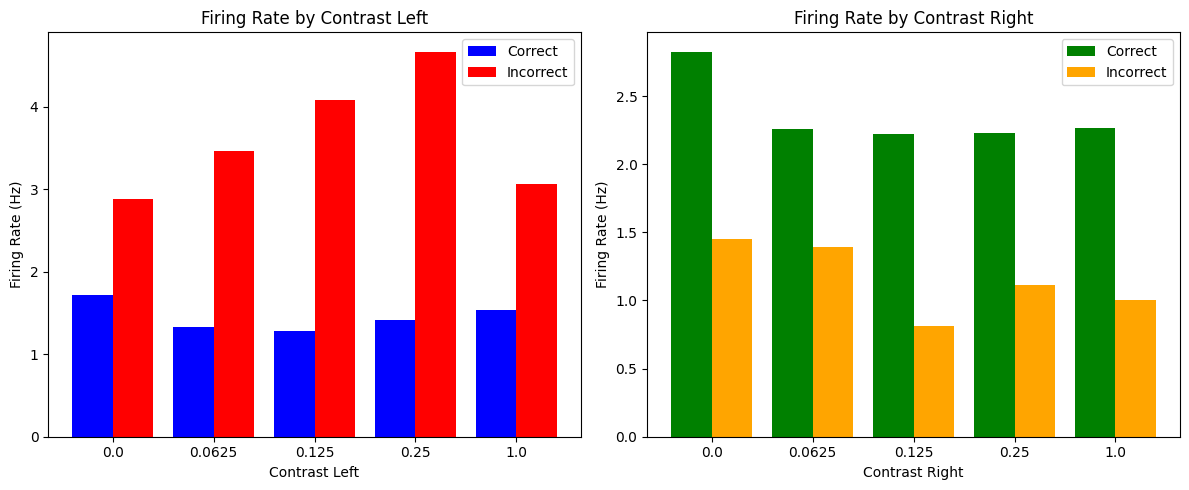

cluster #163


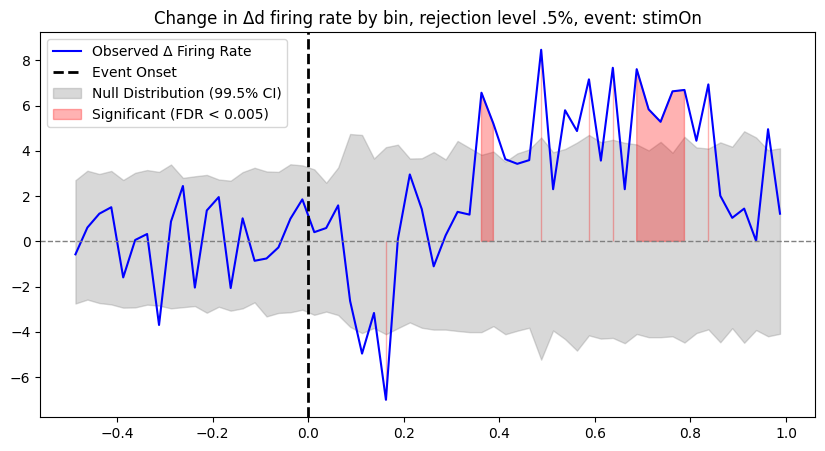

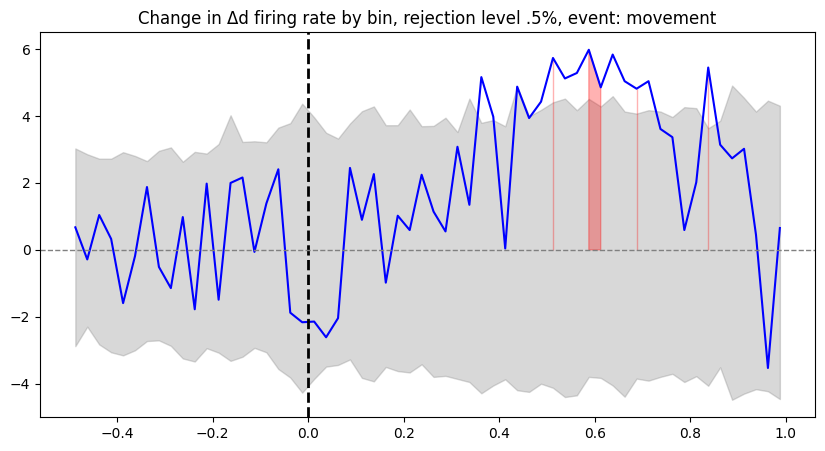

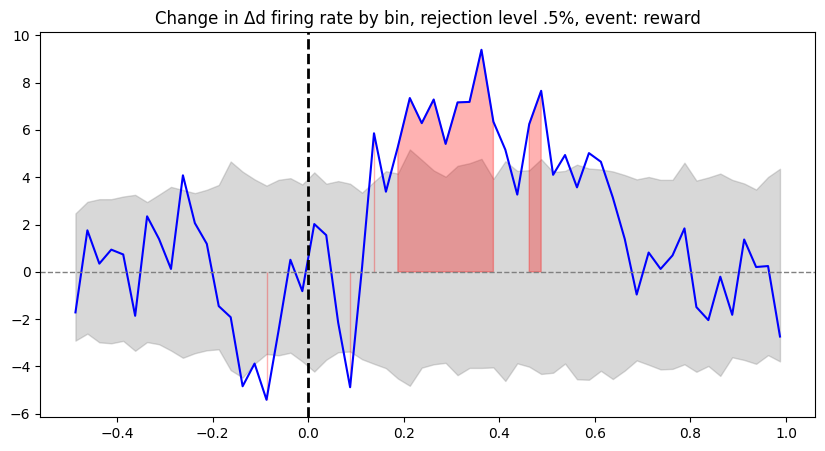

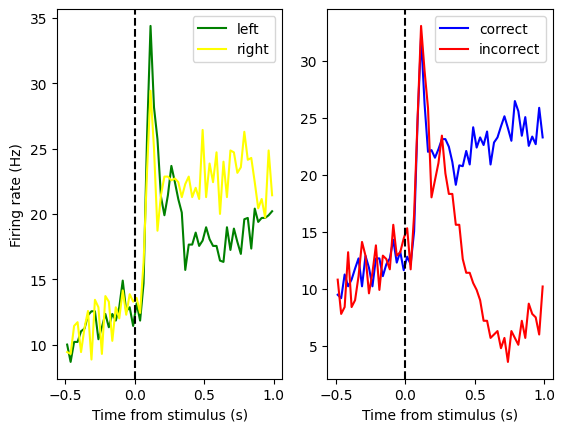

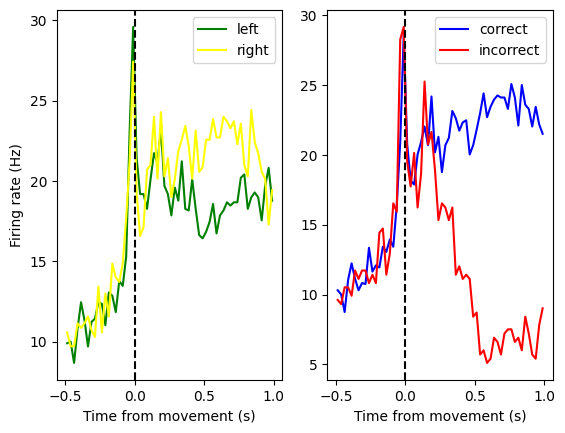

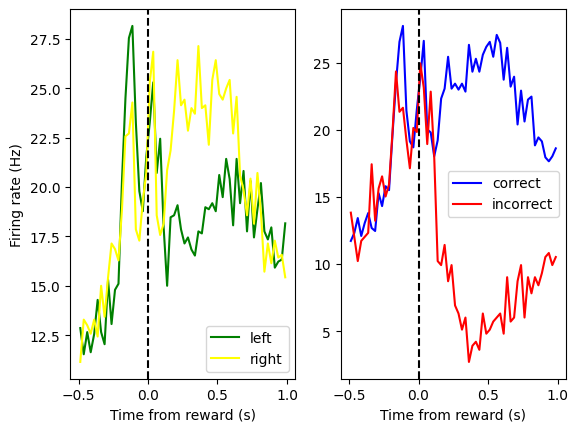

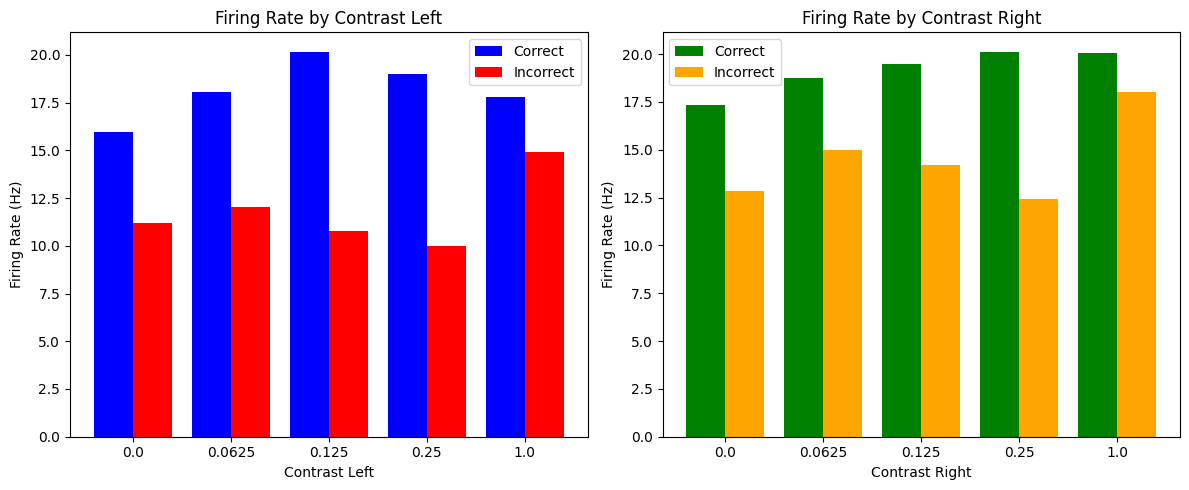

cluster #172


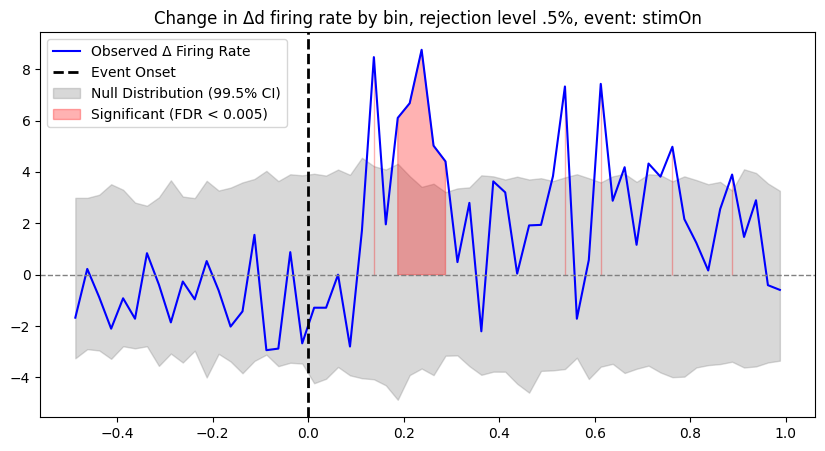

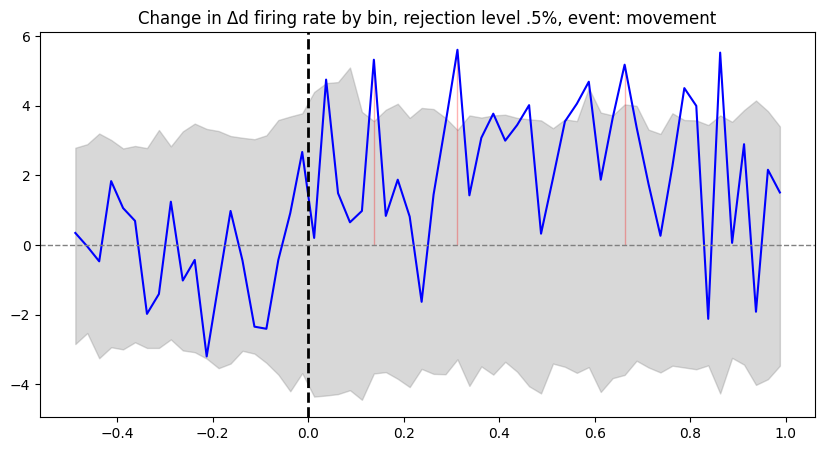

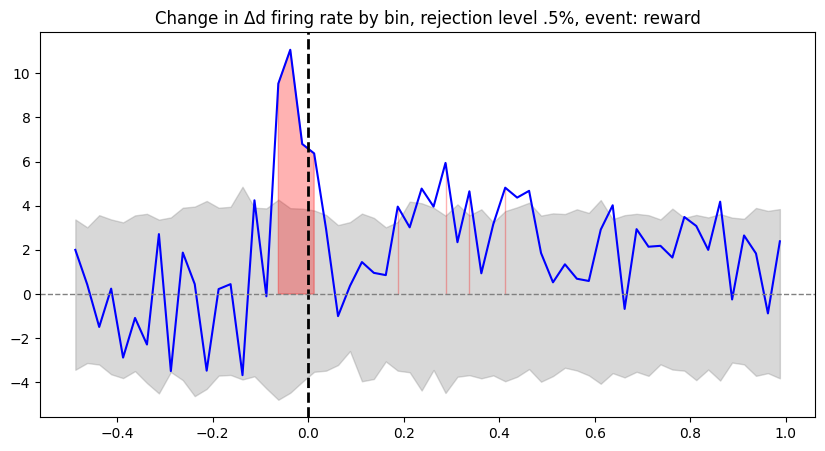

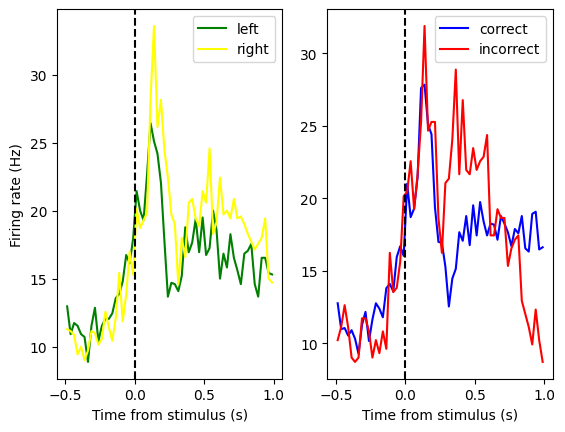

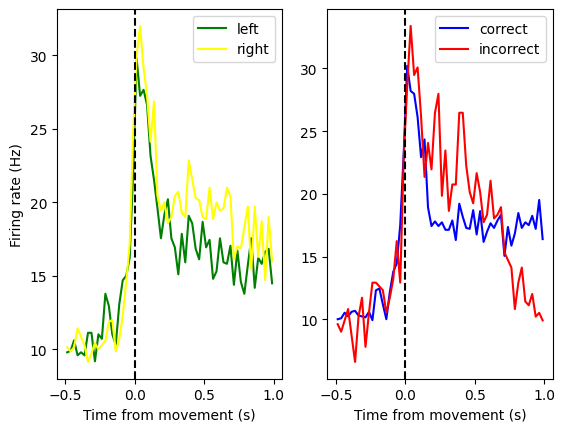

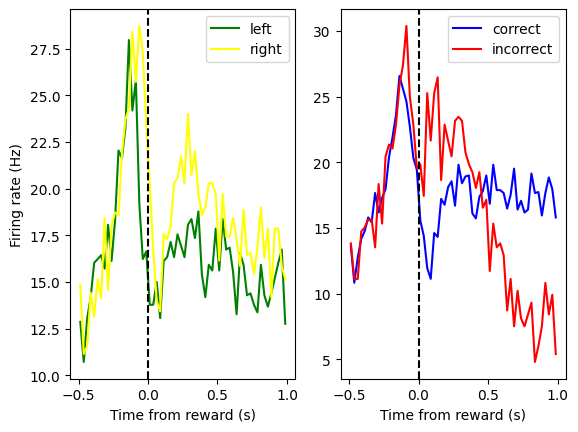

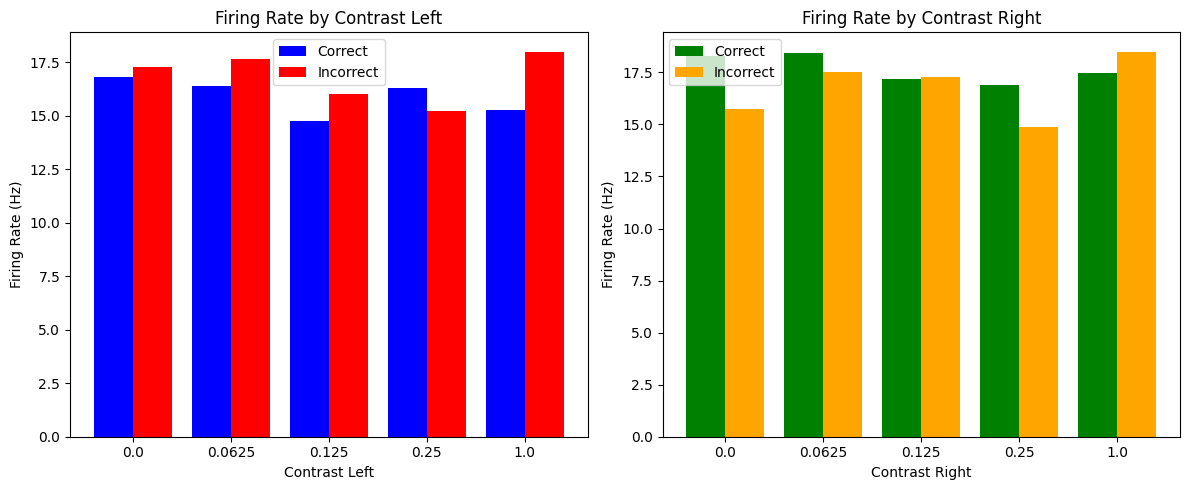

cluster #177


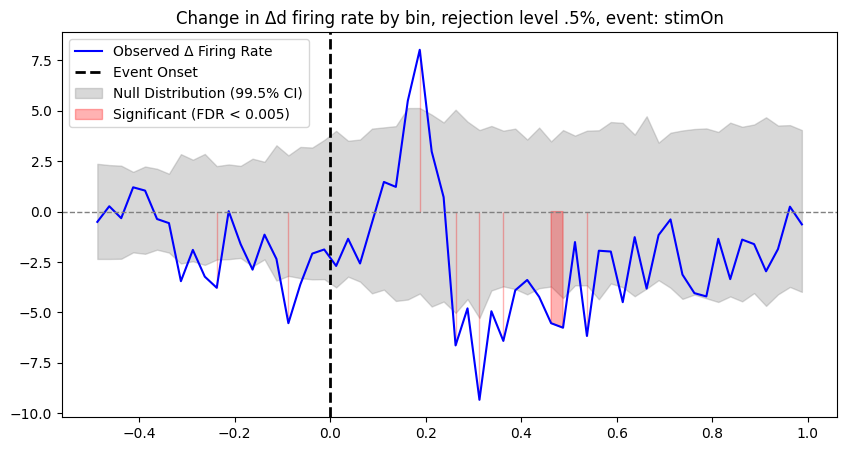

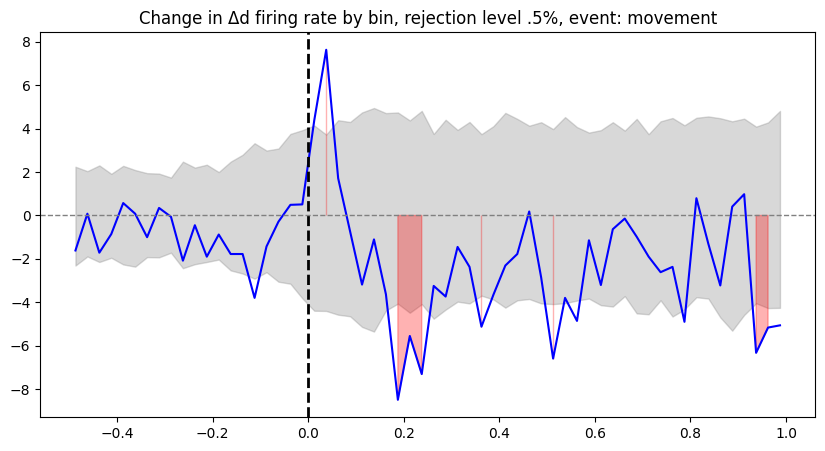

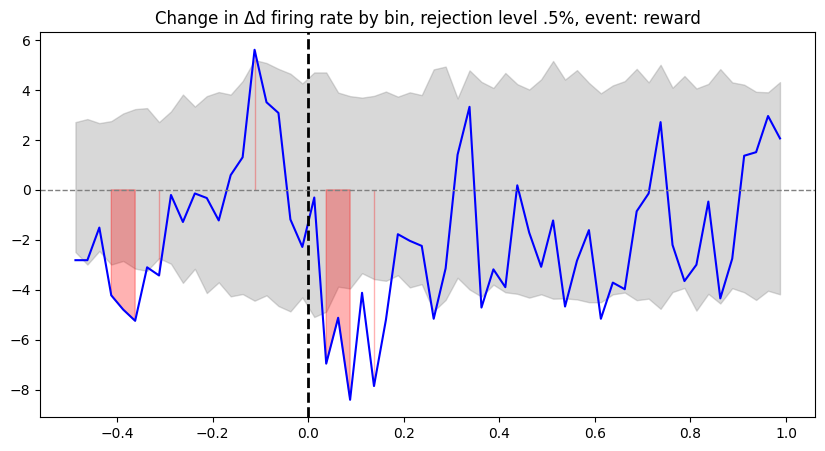

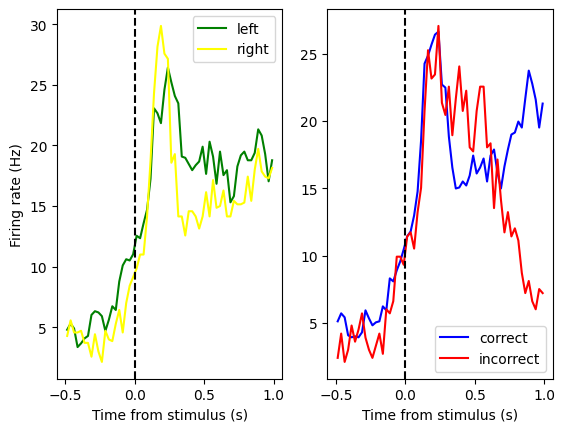

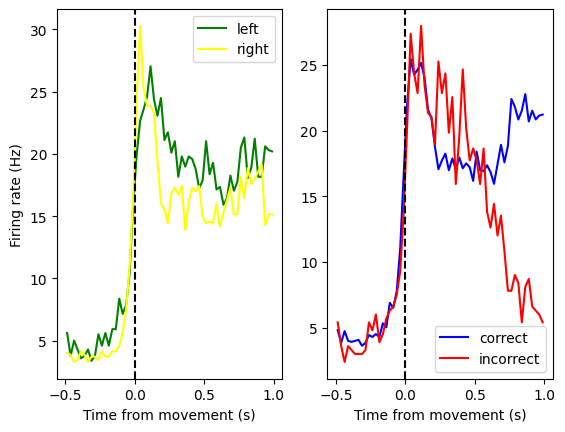

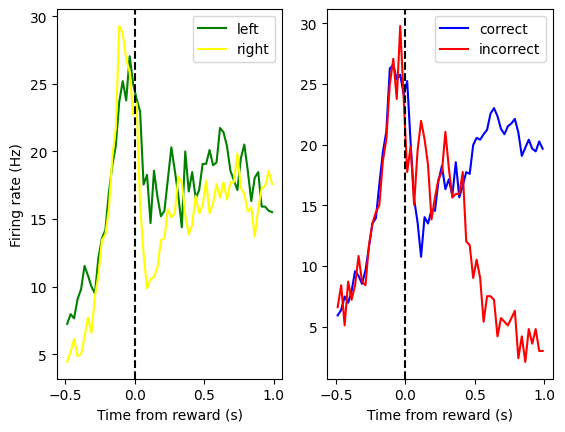

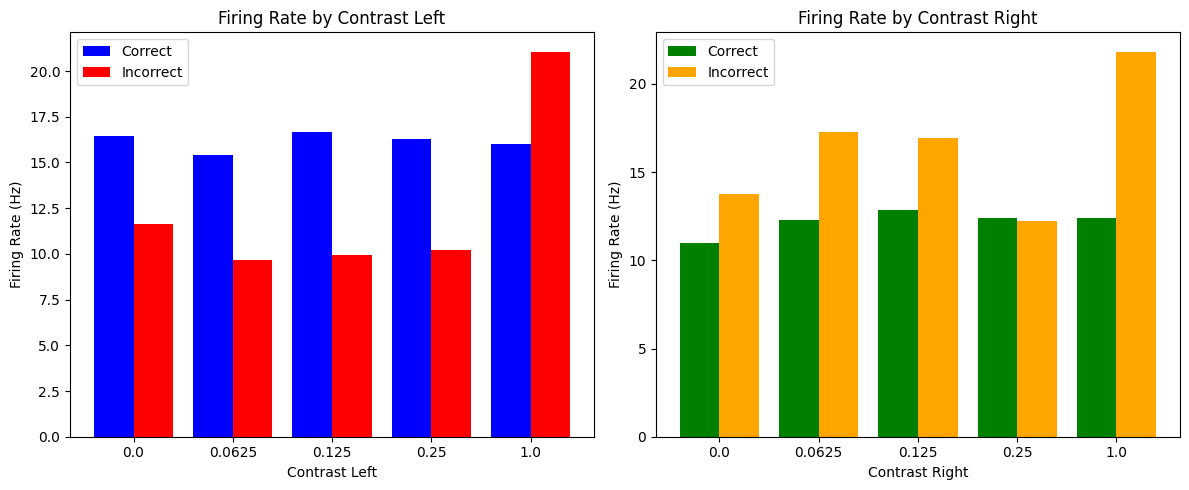

cluster #178


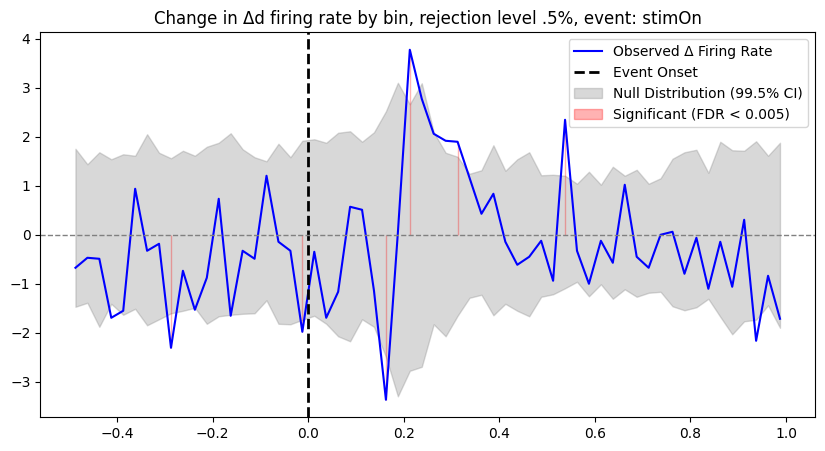

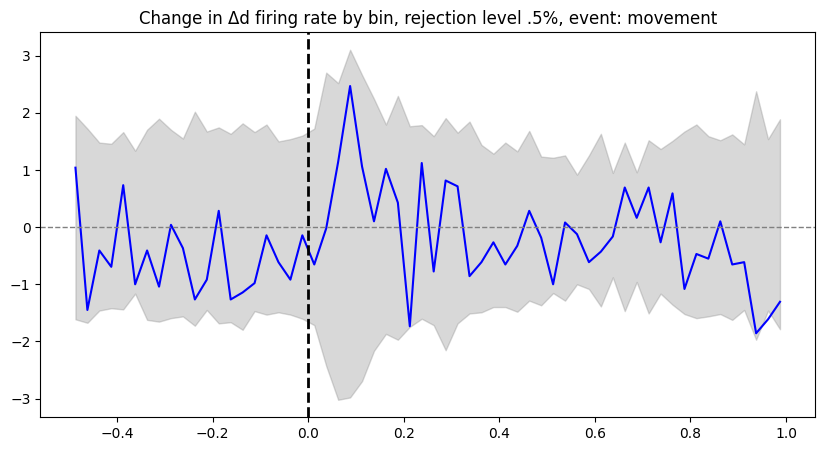

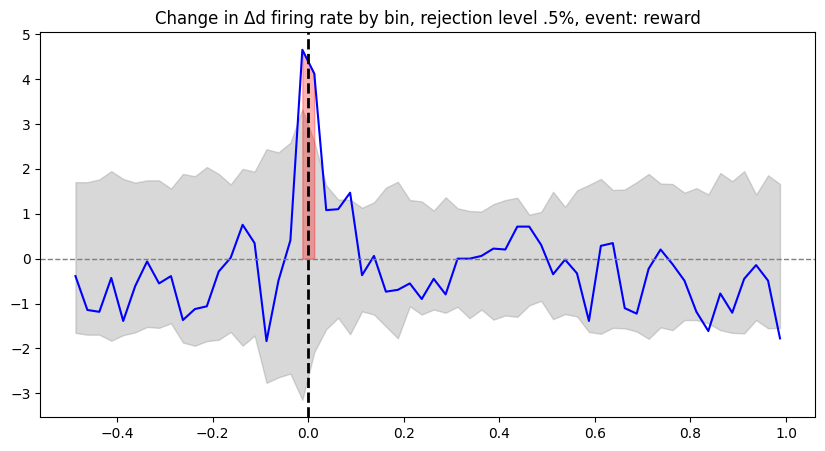

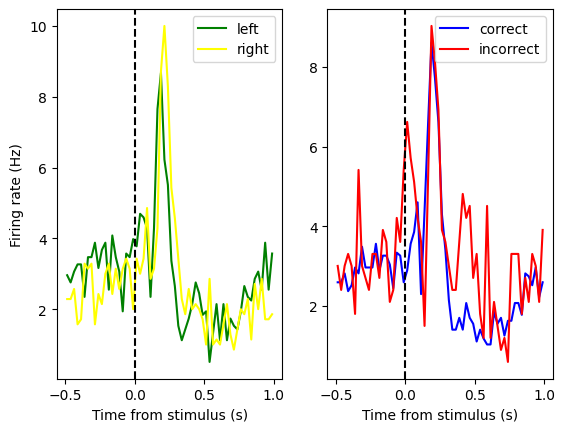

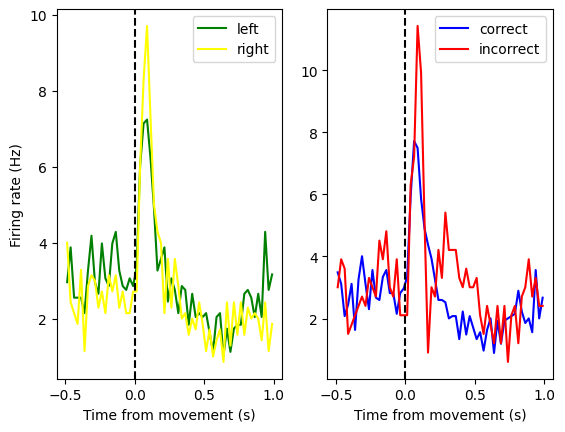

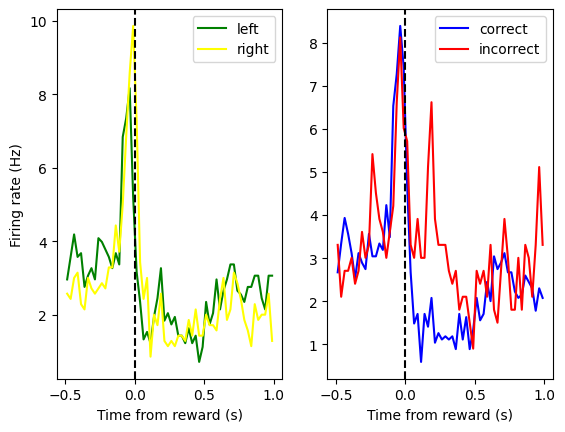

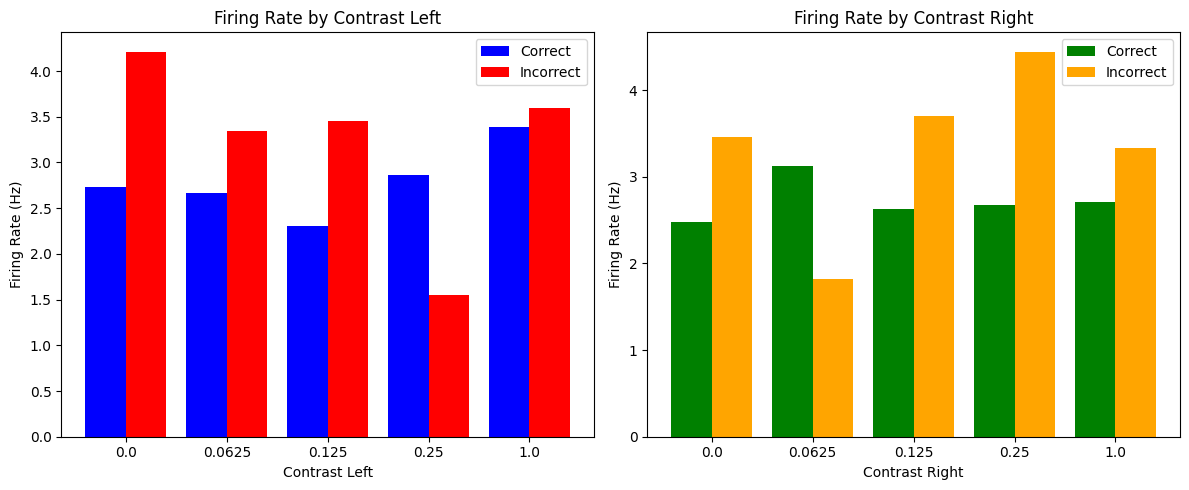

cluster #196


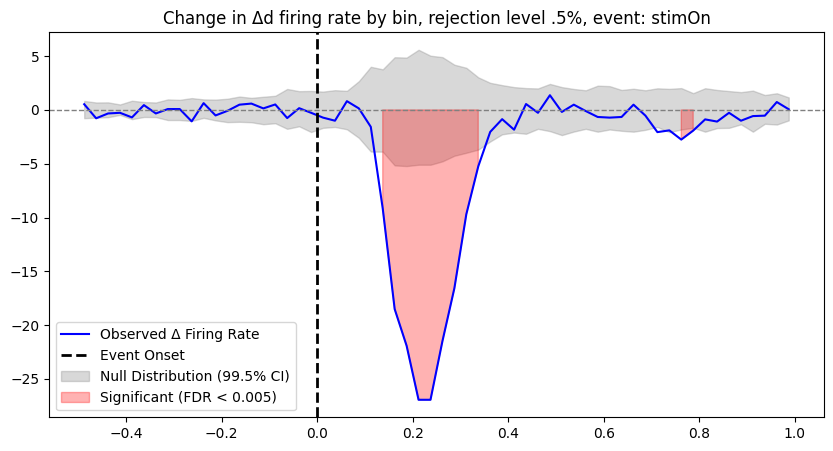

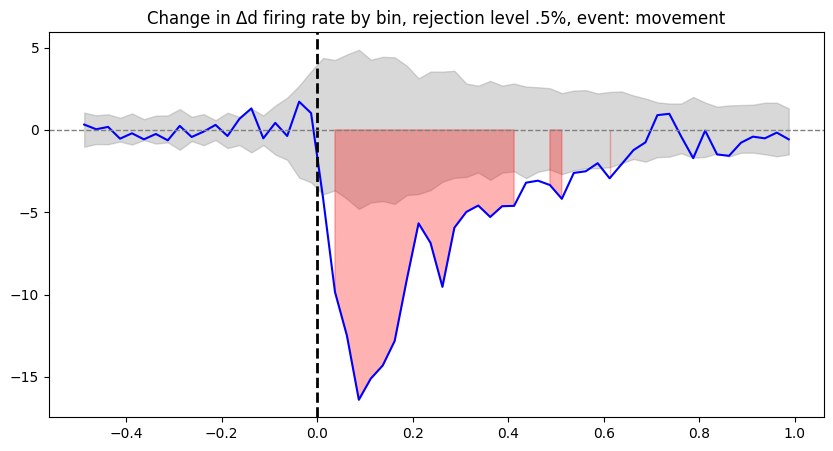

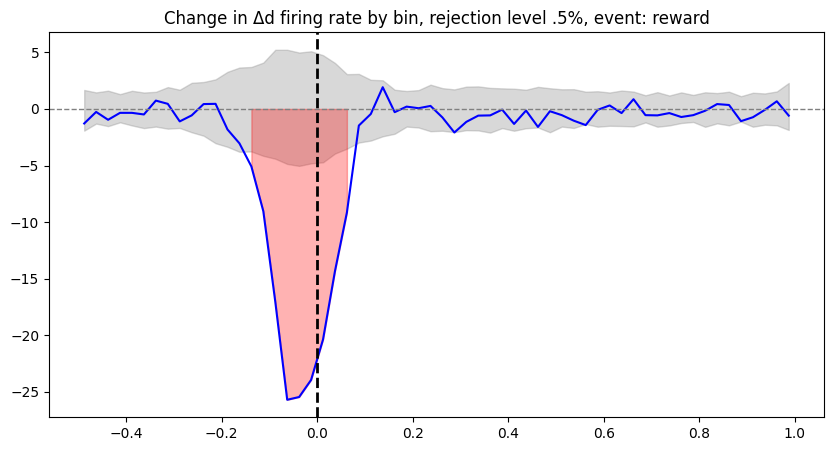

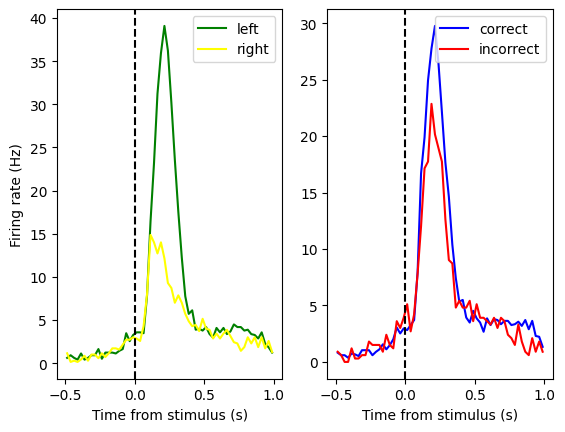

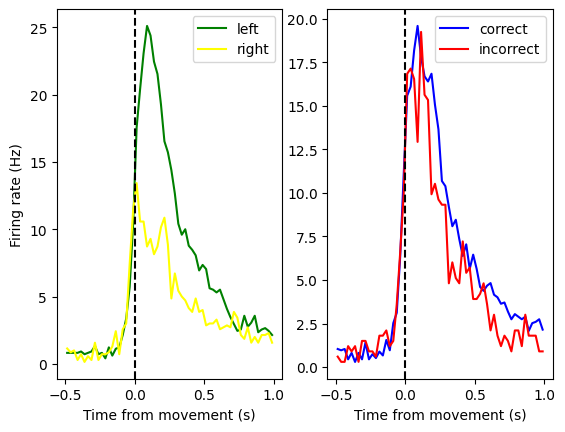

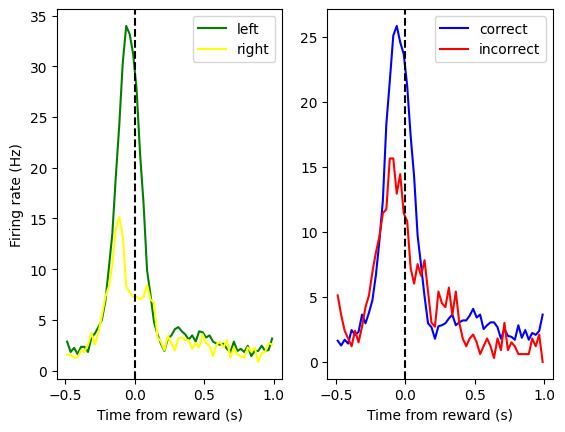

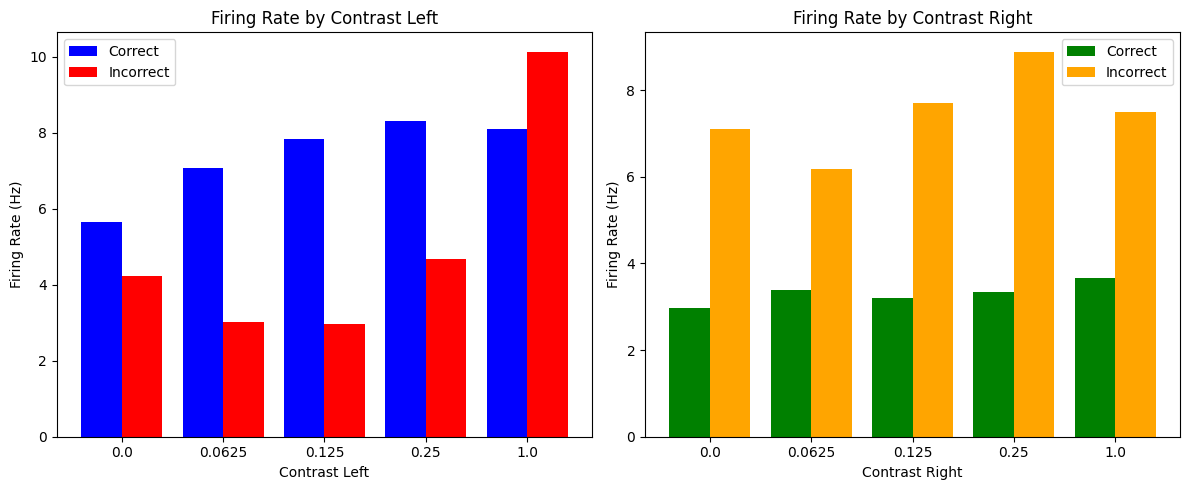

cluster #206


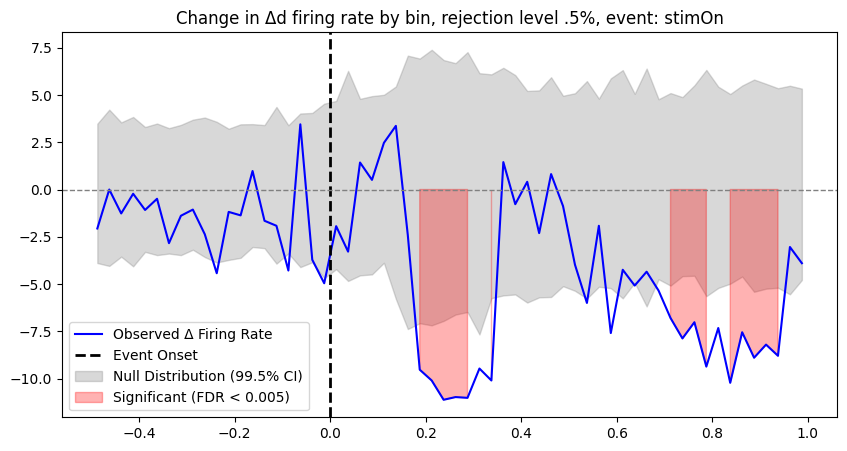

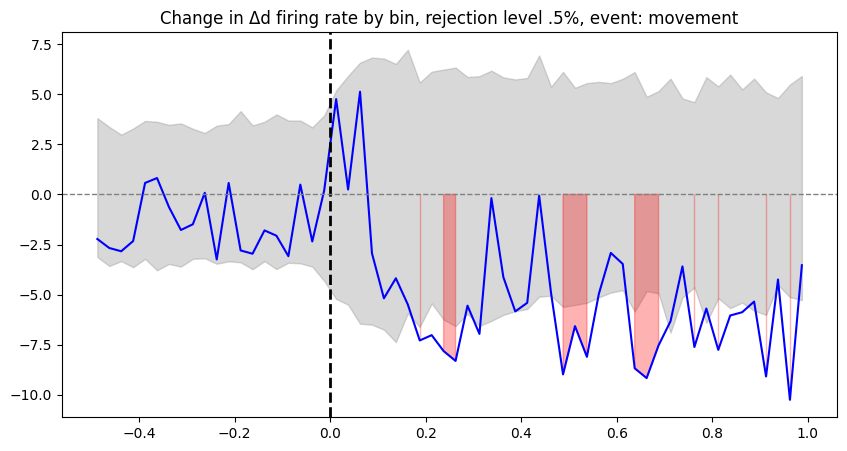

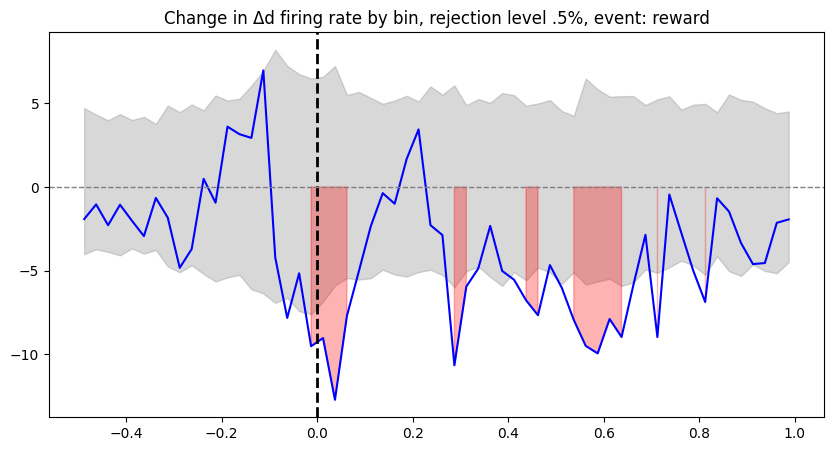

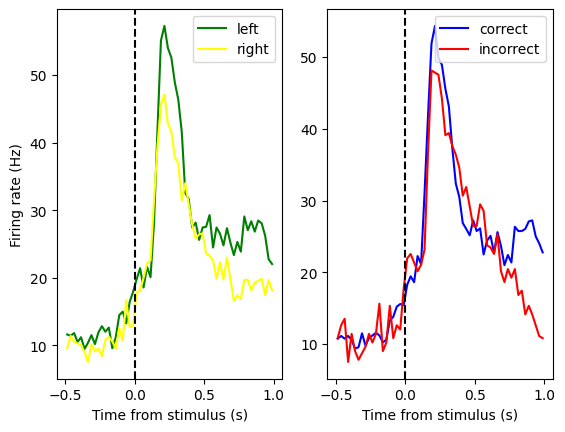

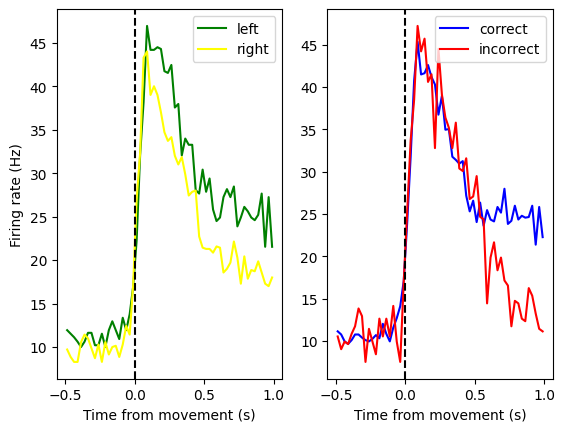

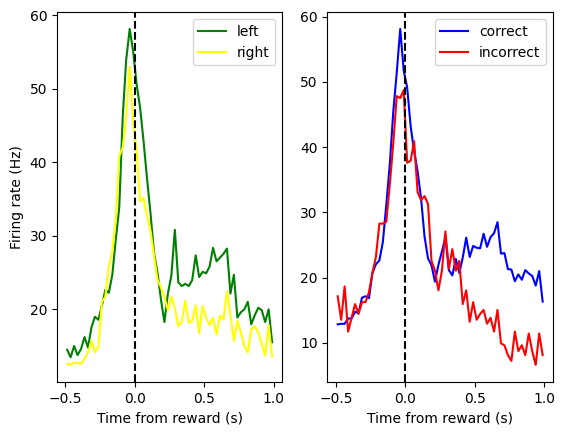

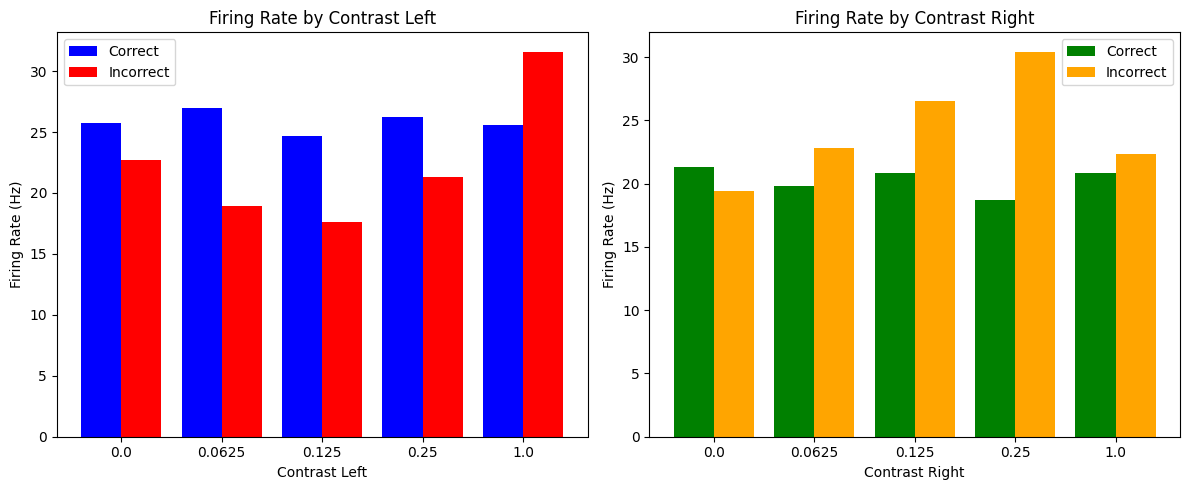

cluster #257


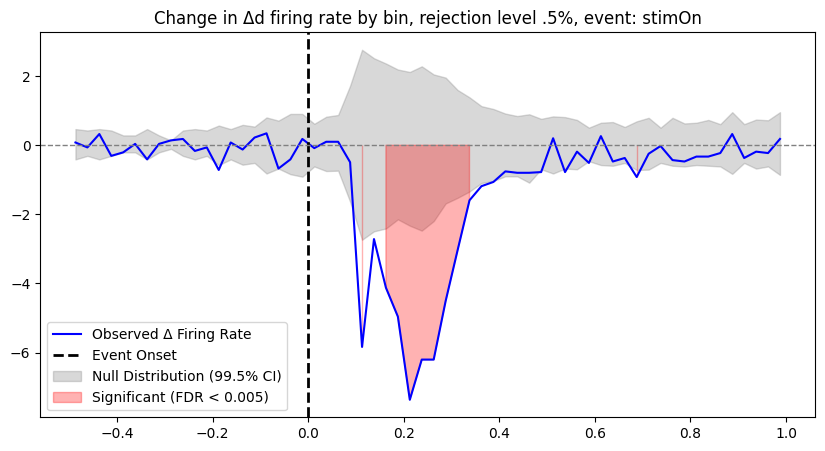

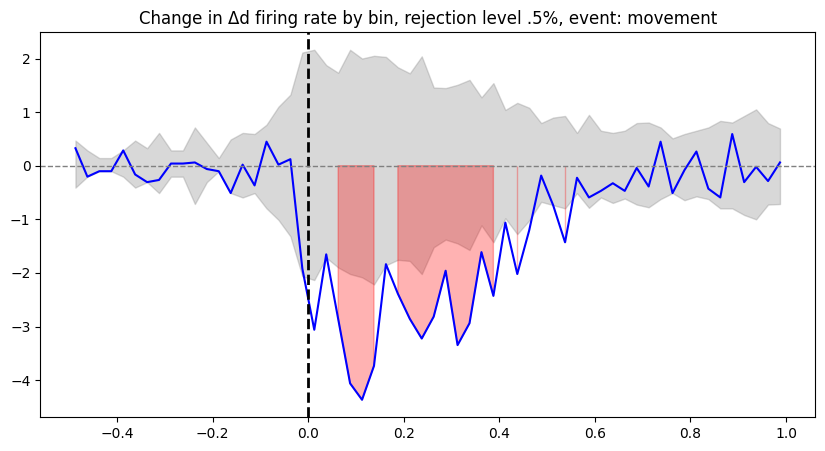

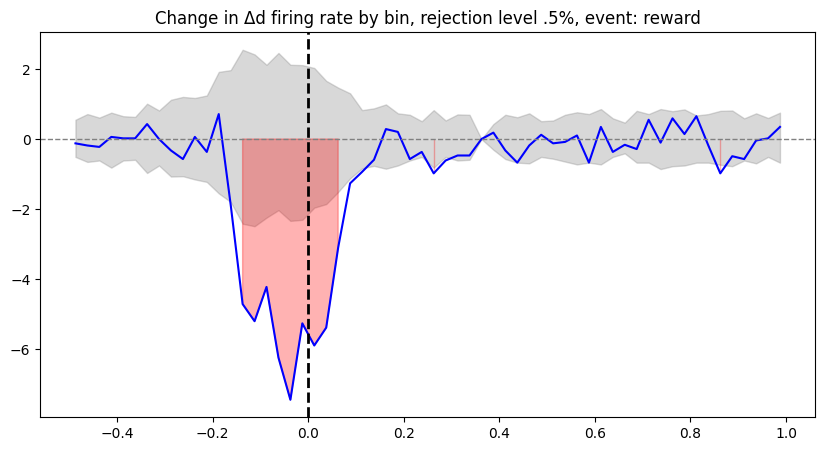

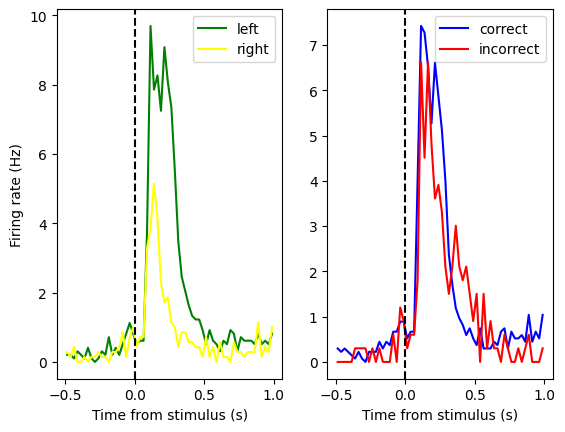

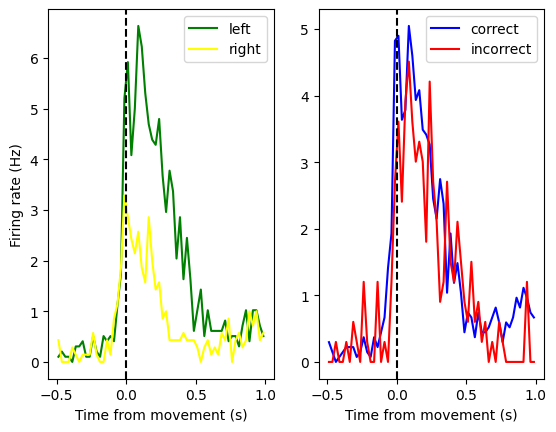

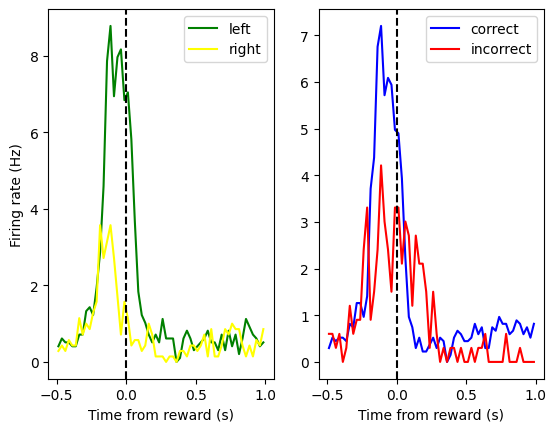

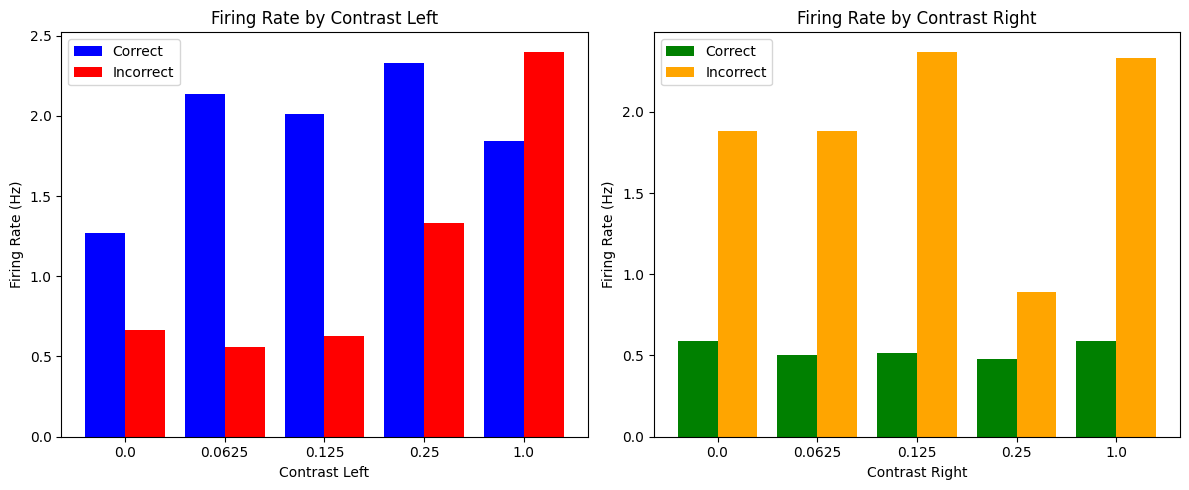

In [23]:
significant_stim_clusters = []
significant_movement_clusters = []
significant_reward_clusters = []
for cluster in cluster_ids:
    spikes_idx = (spikes['clusters'] == cluster)
    spike_times = spikes.times[spikes_idx]
    
    stim_spike_raster, stim_times = bin_spikes(spike_times, stimulus_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    stim_spike_raster = stim_spike_raster / bin_size

    move_spike_raster, move_times = bin_spikes(spike_times, movement_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    move_spike_raster = move_spike_raster / bin_size

    reward_spike_raster, reward_times = bin_spikes(spike_times, reward_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    reward_spike_raster = reward_spike_raster / bin_size

    print(f"cluster #{cluster}")
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on stimulus 
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(stim_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(stim_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    psth_correct = np.nanmean(stim_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(stim_spike_raster[incorrect_idx], axis=0)

#------permutation testing for stimOn event--------------------------------------------------------------------------------------------------------------

    n_shuffles = 1000  # Number of permutations
    
    # Initialize matrices for delta and shuffled deltas
    stim_d = np.zeros((stim_spike_raster.shape[1]))  # Observed delta
    stim_shuffled_d = np.zeros((n_shuffles, stim_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(stim_spike_raster.shape[1]):  # Loop over time bins
        stim_d[i] = np.nanmean(stim_spike_raster[right_idx, i]) - np.nanmean(stim_spike_raster[left_idx, i])
    
    # Compute shuffled distributions
    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)  # Shuffle trial labels
        for i in range(stim_spike_raster.shape[1]):
            stim_shuffled_d[shuff, i] = np.nanmean(stim_spike_raster[shuffled_right, i]) - np.nanmean(stim_spike_raster[shuffled_left, i])
    
    # Compute permutation p-values
    stim_p_values = np.mean(np.abs(stim_shuffled_d) >= np.abs(stim_d), axis=0)
    
    # Step 1: Apply Bonferroni correction
    alpha = 0.005  # Initial significance level
    bonferroni_threshold = alpha / stim_spike_raster.shape[1]  # Adjusted threshold
    
    # Find p-values passing Bonferroni correction
    stim_bonferroni_reject = stim_p_values < bonferroni_threshold
    
    # Step 2: Apply FDR Correction on Remaining P-values
    remaining_p_values = stim_p_values[stim_bonferroni_reject]
    
    if len(remaining_p_values) > 0:
        _, stim_p_fdr_corrected, _, _ = multipletests(remaining_p_values, alpha=alpha, method='fdr_bh')
        
        # Update the significance mask
        stim_final_reject = np.copy(stim_bonferroni_reject)
        stim_final_reject[stim_bonferroni_reject] = stim_p_fdr_corrected < alpha
    else:
        stim_final_reject = np.zeros_like(stim_p_values, dtype=bool)
    
    # Store significant clusters
    significant_stim_times = np.where(stim_final_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(stim_final_reject) > 5:
        significant_stim_clusters.append(cluster)
    
    # Find event time index (time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(stim_times))  
    
    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(stim_times, stim_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level .5%, event: stimOn")
    # Draw event onset line
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  

    # Compute null distribution percentiles for visualization
    lower_bound = np.percentile(stim_shuffled_d, 0.25, axis=0)  # 0.5% percentile (lower bound)
    upper_bound = np.percentile(stim_shuffled_d, 99.75, axis=0)  # 99.5% percentile (upper bound)
    
    # Plot the null distribution as a shaded region
    plt.fill_between(stim_times, lower_bound, upper_bound, color='gray', alpha=0.3, label="Null Distribution (99.5% CI)")
    # Highlight significant time bins
    plt.fill_between(stim_times, stim_d, where=stim_final_reject, color='red', alpha=0.3, label="Significant (FDR < 0.005)")
    
    plt.legend()
    plt.show()

   





 ##-------permutation testing for firstMove event------------------------------------------------------------------------------------------------------
    
    # Initialize matrices for delta and shuffled deltas
    movement_d = np.zeros((move_spike_raster.shape[1]))  # Observed delta
    shuffled_movement_d = np.zeros((n_shuffles, move_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(move_spike_raster.shape[1]):  # Loop over time bins
        movement_d[i] = np.nanmean(move_spike_raster[right_idx, i]) - np.nanmean(move_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(stim_spike_raster.shape[1]):
            shuffled_movement_d[shuff, i] = np.nanmean(move_spike_raster[shuffled_right, i]) - np.nanmean(move_spike_raster[shuffled_left, i])
    movement_p_values = np.mean(np.abs(shuffled_movement_d) >= np.abs(movement_d), axis=0)

    # Step 1: Apply Bonferroni correction
    alpha = 0.005  # Initial significance level
    bonferroni_threshold = alpha / move_spike_raster.shape[1]  # Adjusted threshold
    
    # Find p-values passing Bonferroni correction
    movement_bonferroni_reject = movement_p_values < bonferroni_threshold
    
    # Step 2: Apply FDR Correction on Remaining P-values
    remaining_p_values = movement_p_values[movement_bonferroni_reject]
    
    if len(remaining_p_values) > 0:
        _, movement_p_fdr_corrected, _, _ = multipletests(remaining_p_values, alpha=alpha, method='fdr_bh')
        
        # Update the significance mask
        movement_final_reject = np.copy(movement_bonferroni_reject)
        movement_final_reject[movement_bonferroni_reject] = movement_p_fdr_corrected < alpha
    else:
        movement_final_reject = np.zeros_like(movement_p_values, dtype=bool)
    
    # Store significant clusters
    significant_movement_times = np.where(movement_final_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(movement_final_reject) > 5:
        significant_movement_clusters.append(cluster)
        
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(move_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(move_times, movement_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level .5%, event: movement")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
    # Compute null distribution percentiles for visualization
    lower_bound = np.percentile(shuffled_movement_d, 0.25, axis=0)  
    upper_bound = np.percentile(shuffled_movement_d, 99.75, axis=0)  
    
    # Plot the null distribution as a shaded region
    plt.fill_between(move_times, lower_bound, upper_bound, color='gray', alpha=0.3, label="Null Distribution (99.5% CI)")
    # Highlight significant time bins only
    plt.fill_between(move_times, movement_d, where=movement_final_reject, color='red', alpha=0.3, label="Significant (FDR < 0.005)")
    
##-----------permutation testing for reward event------------------------------------------------------------------------------------------------------
    
    # Initialize matrices for delta and shuffled deltas
    reward_d = np.zeros((reward_spike_raster.shape[1]))  # Observed delta
    shuffled_reward_d = np.zeros((n_shuffles, reward_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(reward_spike_raster.shape[1]):  # Loop over time bins
        reward_d[i] = np.nanmean(reward_spike_raster[right_idx, i]) - np.nanmean(reward_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(reward_spike_raster.shape[1]):
            shuffled_reward_d[shuff, i] = np.nanmean(reward_spike_raster[shuffled_right, i]) - np.nanmean(reward_spike_raster[shuffled_left, i])
    reward_p_values = np.mean(np.abs(shuffled_reward_d) >= np.abs(reward_d), axis=0)

    # Step 1: Apply Bonferroni correction
    alpha = 0.005  # Initial significance level
    bonferroni_threshold = alpha / reward_spike_raster.shape[1]  # Adjusted threshold
    
    # Find p-values passing Bonferroni correction
    reward_bonferroni_reject = reward_p_values < bonferroni_threshold
    
    # Step 2: Apply FDR Correction on Remaining P-values
    remaining_p_values = reward_p_values[reward_bonferroni_reject]
    
    if len(remaining_p_values) > 0:
        _, reward_p_fdr_corrected, _, _ = multipletests(remaining_p_values, alpha=alpha, method='fdr_bh')
        
        # Update the significance 
        reward_final_reject = np.copy(reward_bonferroni_reject)
        reward_final_reject[reward_bonferroni_reject] = reward_p_fdr_corrected < alpha
    else:
        reward_final_reject = np.zeros_like(reward_p_values, dtype=bool)
    
    significant_reward_times = np.where(reward_final_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(reward_final_reject) > 5:
        significant_reward_clusters.append(cluster)
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(reward_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(reward_times, reward_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level .5%, event: reward")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
     # Compute null distribution percentiles for visualization
    lower_bound = np.percentile(shuffled_reward_d, 0.25, axis=0)  # 2.5% percentile (lower bound)
    upper_bound = np.percentile(shuffled_reward_d, 99.75, axis=0)  # 97.5% percentile (upper bound)
    
    # Plot the null distribution as a shaded region
    plt.fill_between(reward_times, lower_bound, upper_bound, color='gray', alpha=0.3, label="Null Distribution (99.5% CI)")
    # Highlight significant time bins only
    # Highlight significant time bins only
    plt.fill_between(reward_times, reward_d, where=reward_final_reject, color='red', alpha=0.3, label="Significant (FDR < 0.005)")
 ##-----sub-graphs----------------------------------------------------------------------------------------------------------------------------------------   
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(stim_times, psth_left, c='green')
    axs[0].plot(stim_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from stimulus (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(stim_times, psth_correct, c='blue')
    axs[1].plot(stim_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from stimulus (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on movement
    psth_left = np.nanmean(move_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(move_spike_raster[right_idx], axis=0)
    psth_correct = np.nanmean(move_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(move_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(move_times, psth_left, c='green')
    axs[0].plot(move_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from movement (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(move_times, psth_correct, c='blue')
    axs[1].plot(move_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from movement (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on reward
    psth_left = np.nanmean(reward_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(reward_spike_raster[right_idx], axis=0)
    psth_correct = np.nanmean(reward_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(reward_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(reward_times, psth_left, c='green')
    axs[0].plot(reward_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from reward (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(reward_times, psth_correct, c='blue')
    axs[1].plot(reward_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from reward (s)')

    plt.show()

    contrast_levels_left = np.unique(sl.trials['contrastLeft'][~np.isnan(sl.trials['contrastLeft'])])
    contrast_levels_right = np.unique(sl.trials['contrastRight'][~np.isnan(sl.trials['contrastRight'])])
    
    # Initialize lists to store mean firing rates
    firing_rates_correct_left = []
    firing_rates_incorrect_left = []
    firing_rates_correct_right = []
    firing_rates_incorrect_right = []
    
    # Compute firing rates for each contrast level
    for contrast in contrast_levels_left:
        idx = sl.trials['contrastLeft'] == contrast
        firing_rates_correct_left.append(np.nanmean(stim_spike_raster[idx & correct_idx]))
        firing_rates_incorrect_left.append(np.nanmean(stim_spike_raster[idx & incorrect_idx]))
    
    for contrast in contrast_levels_right:
        idx = sl.trials['contrastRight'] == contrast
        firing_rates_correct_right.append(np.nanmean(stim_spike_raster[idx & correct_idx]))
        firing_rates_incorrect_right.append(np.nanmean(stim_spike_raster[idx & incorrect_idx]))
    
    # Convert contrast values to strings for labeling
    contrast_labels_left = [str(c) for c in contrast_levels_left]
    contrast_labels_right = [str(c) for c in contrast_levels_right]
    
    # Plot Bar Graphs for contrastLeft
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    x = np.arange(len(contrast_levels_left))  # x-axis positions
    
    axs[0].bar(x - 0.2, firing_rates_correct_left, width=0.4, label='Correct', color='blue')
    axs[0].bar(x + 0.2, firing_rates_incorrect_left, width=0.4, label='Incorrect', color='red')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(contrast_labels_left)
    axs[0].set_xlabel('Contrast Left')
    axs[0].set_ylabel('Firing Rate (Hz)')
    axs[0].set_title('Firing Rate by Contrast Left')
    axs[0].legend()
    
    # Plot Bar Graphs for contrastRight
    x = np.arange(len(contrast_levels_right))  # x-axis positions
    axs[1].bar(x - 0.2, firing_rates_correct_right, width=0.4, label='Correct', color='green')
    axs[1].bar(x + 0.2, firing_rates_incorrect_right, width=0.4, label='Incorrect', color='orange')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(contrast_labels_right)
    axs[1].set_xlabel('Contrast Right')
    axs[1].set_ylabel('Firing Rate (Hz)')
    axs[1].set_title('Firing Rate by Contrast Right')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()




In [16]:
significant_stim_clusters, significant_movement_clusters, significant_reward_clusters

([np.int64(163), np.int64(172), np.int64(177), np.int64(178), np.int64(206)],
 [np.int64(172), np.int64(196), np.int64(206), np.int64(257)],
 [np.int64(147), np.int64(163), np.int64(172), np.int64(196), np.int64(206)])

# Checking smaller time bins

In [17]:
bin_size = 0.025
pre_time = 0.5
post_time = 1

cluster #11


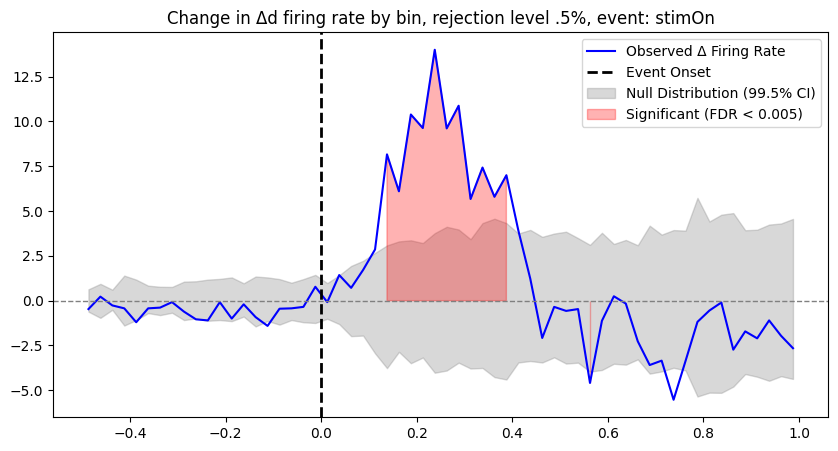

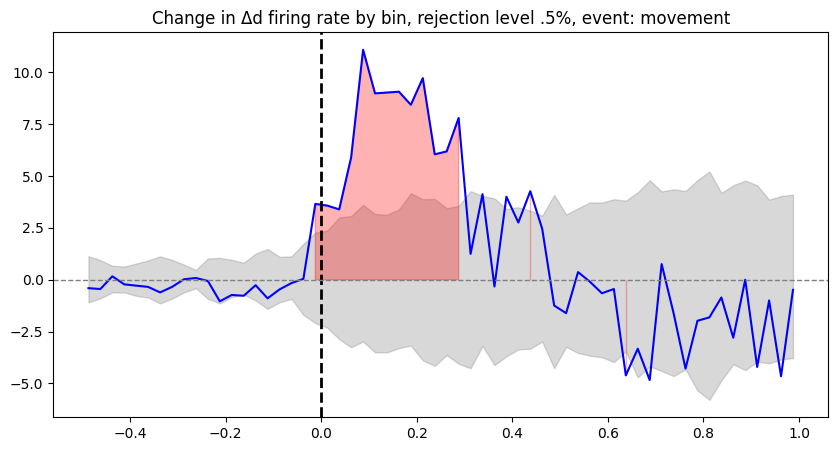

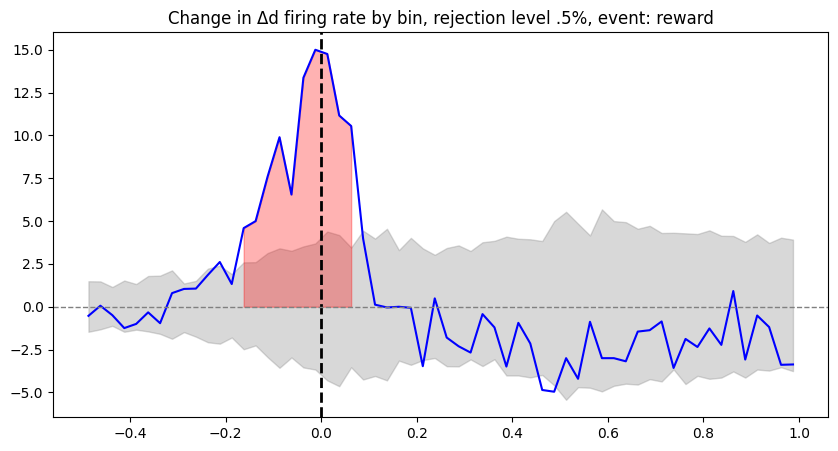

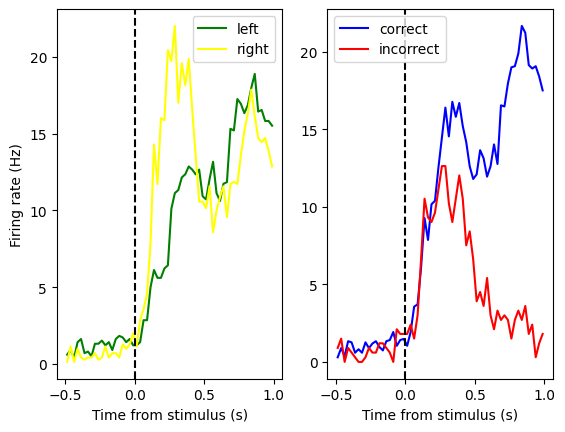

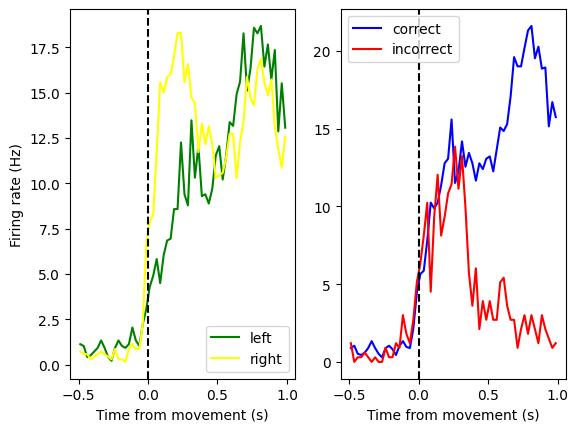

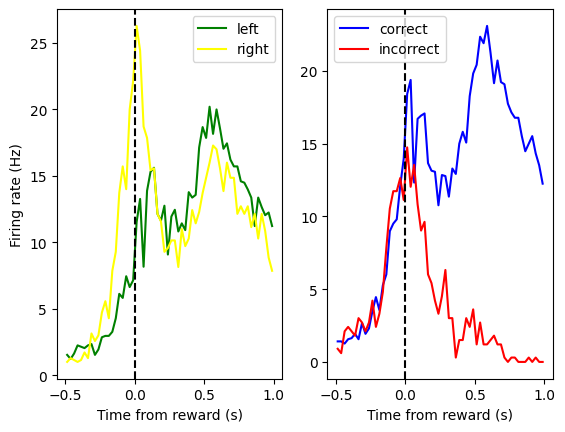

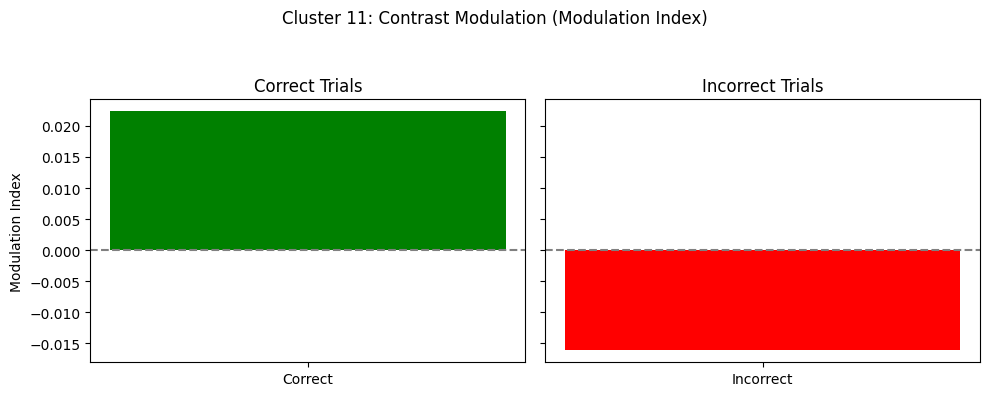

cluster #69


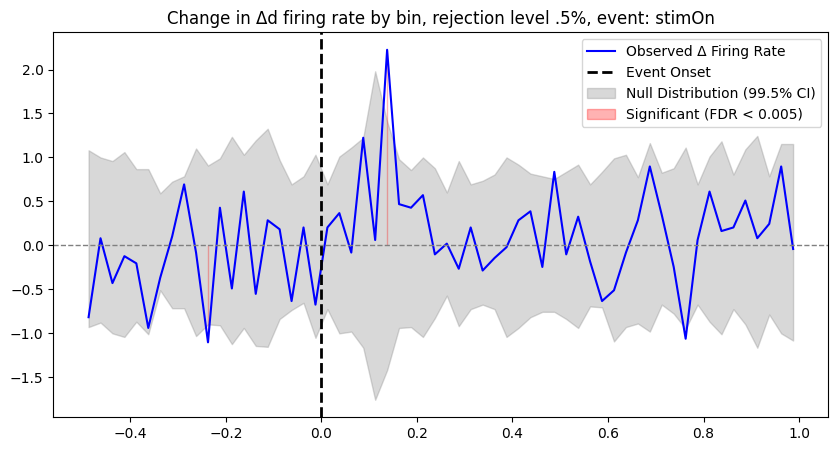

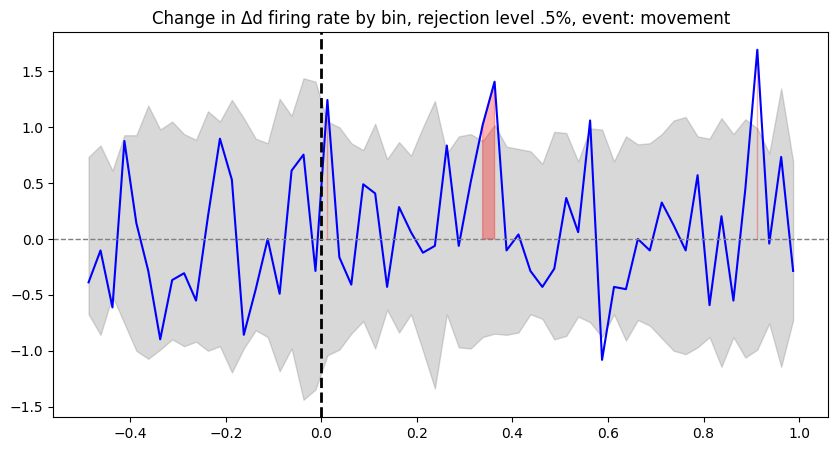

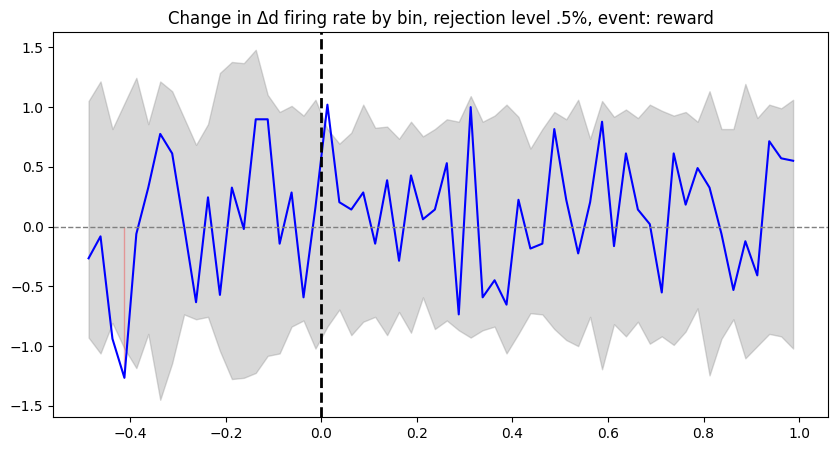

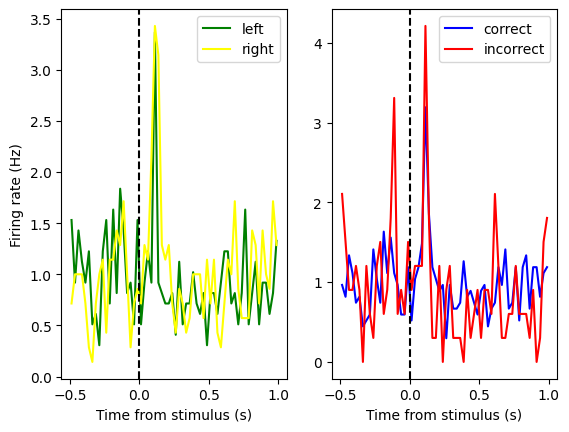

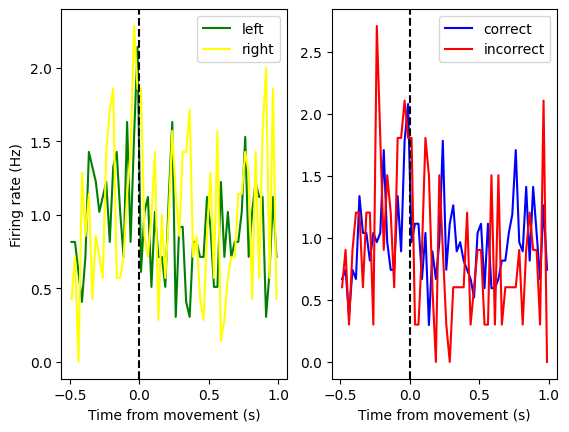

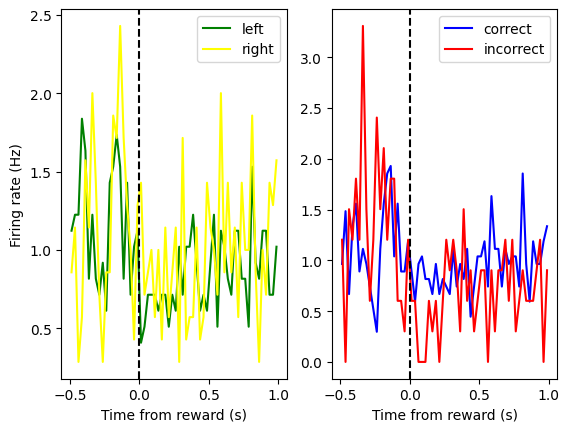

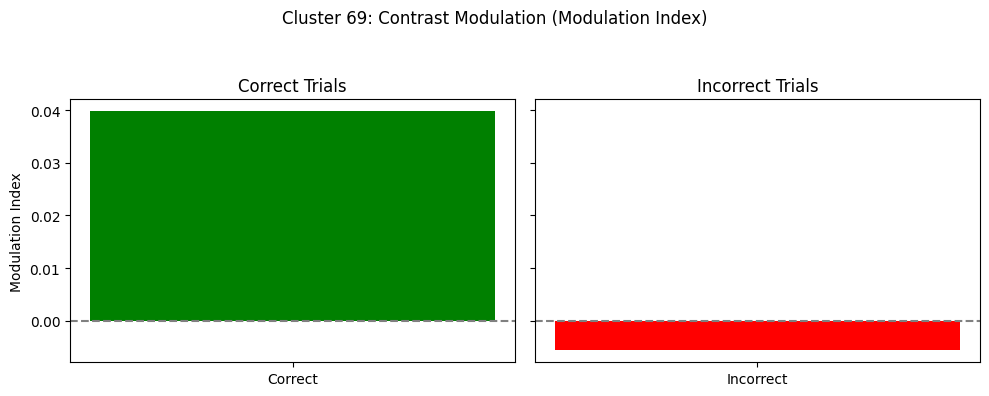

cluster #147


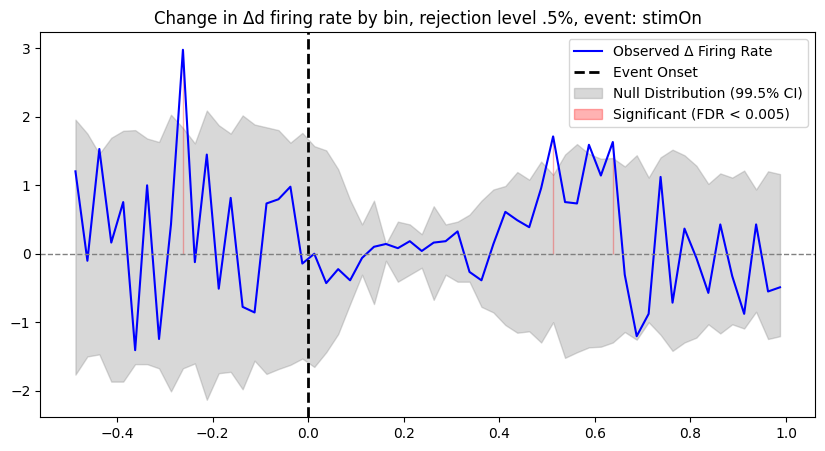

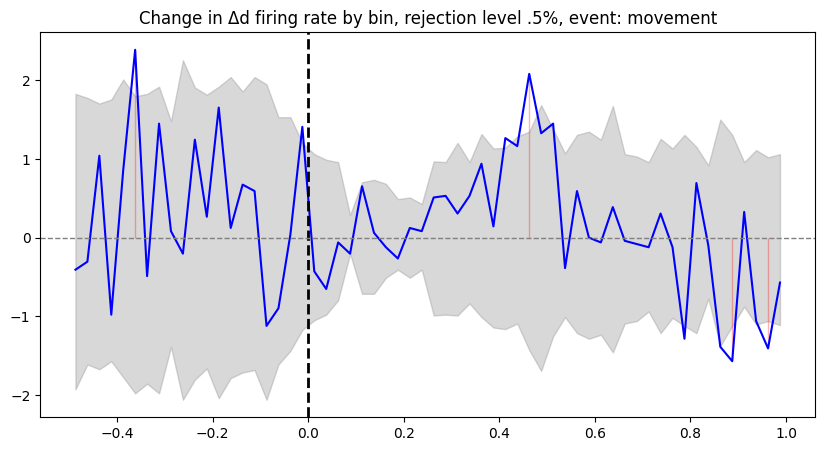

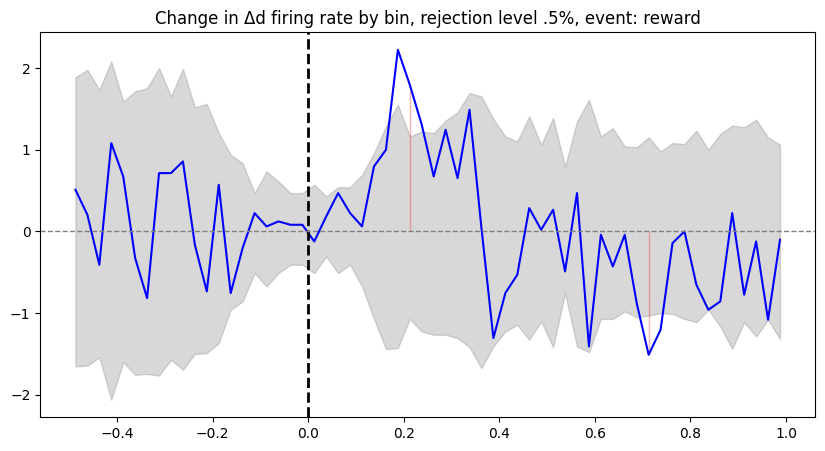

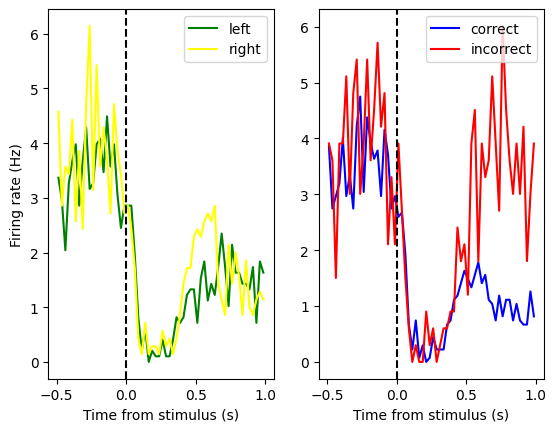

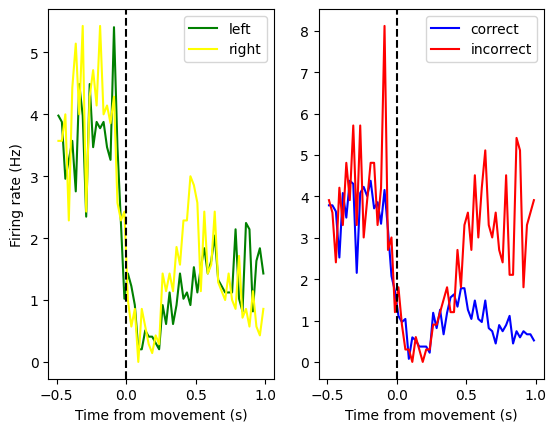

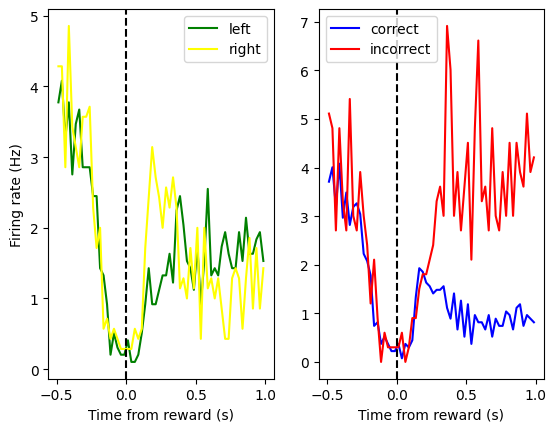

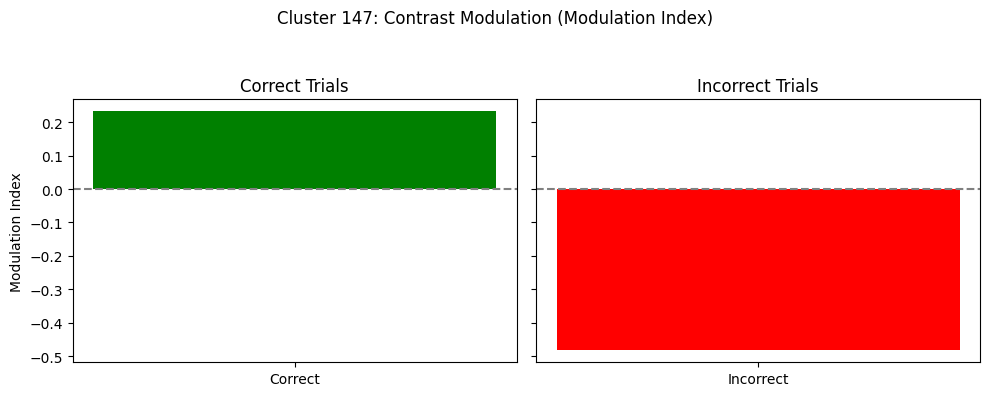

cluster #163


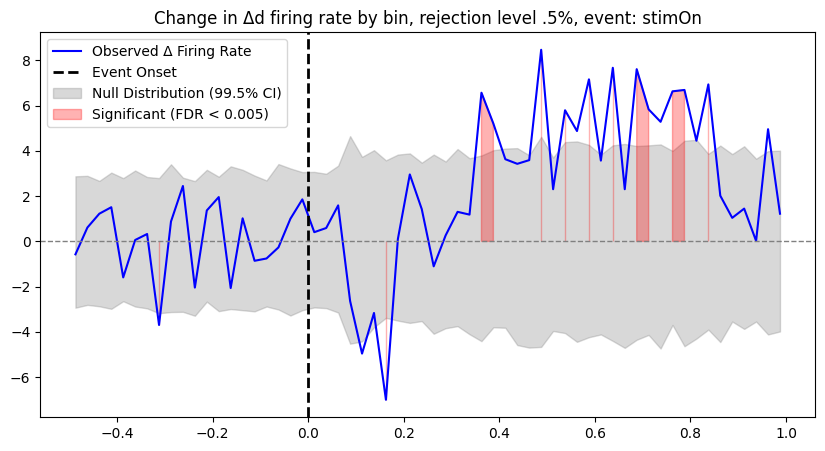

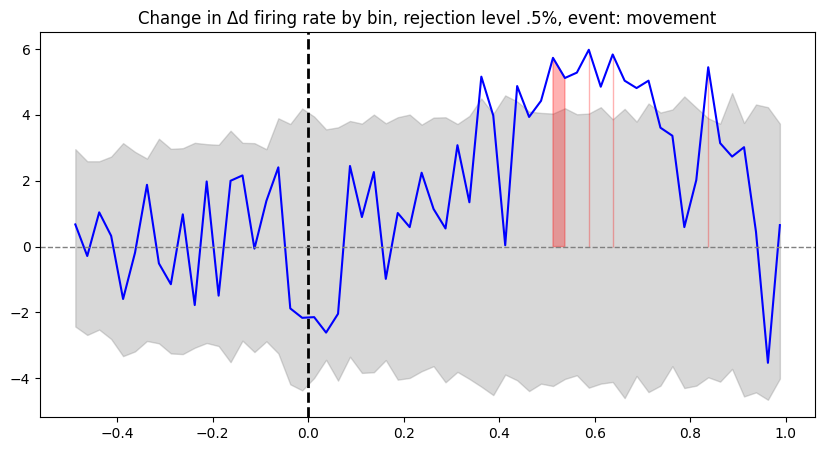

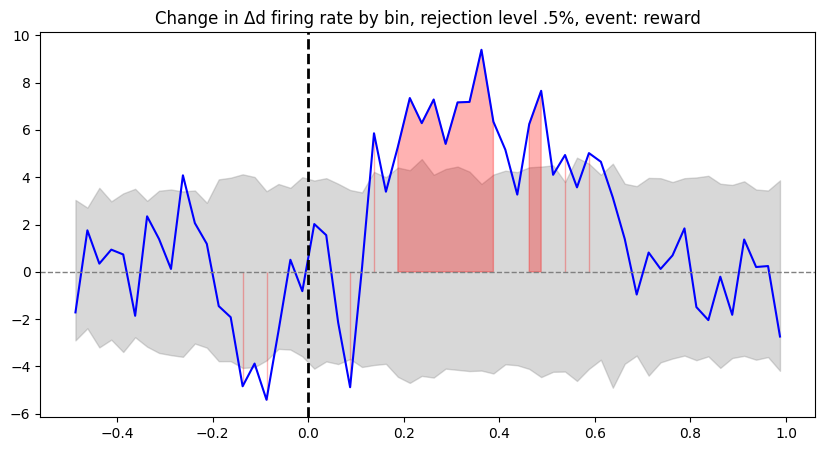

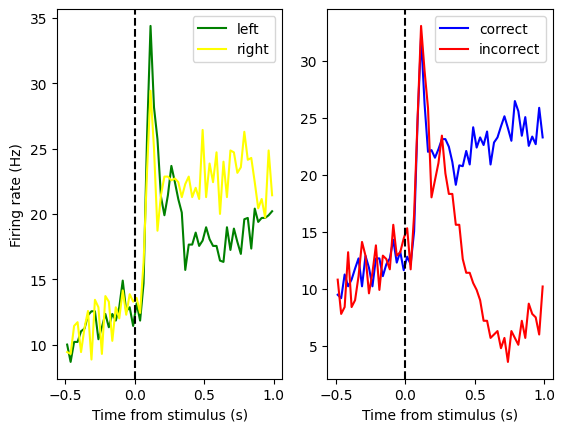

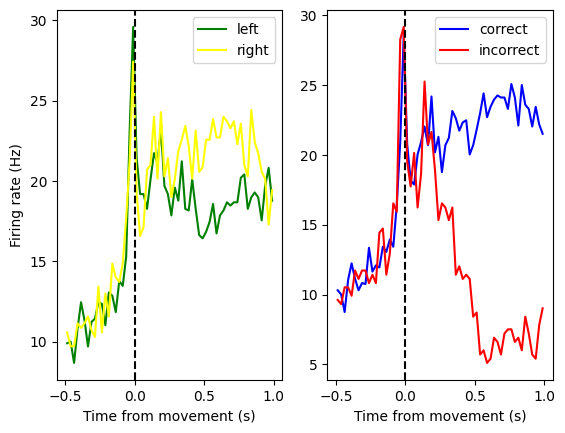

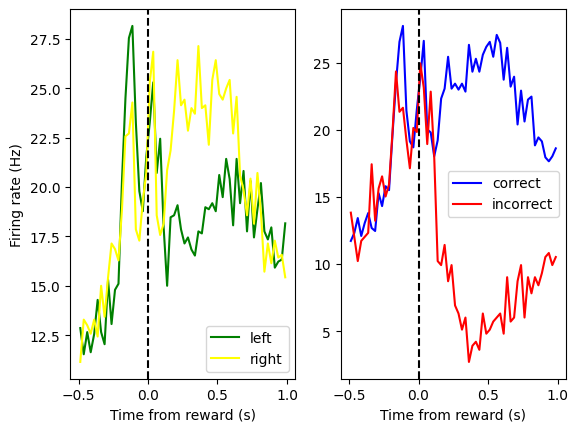

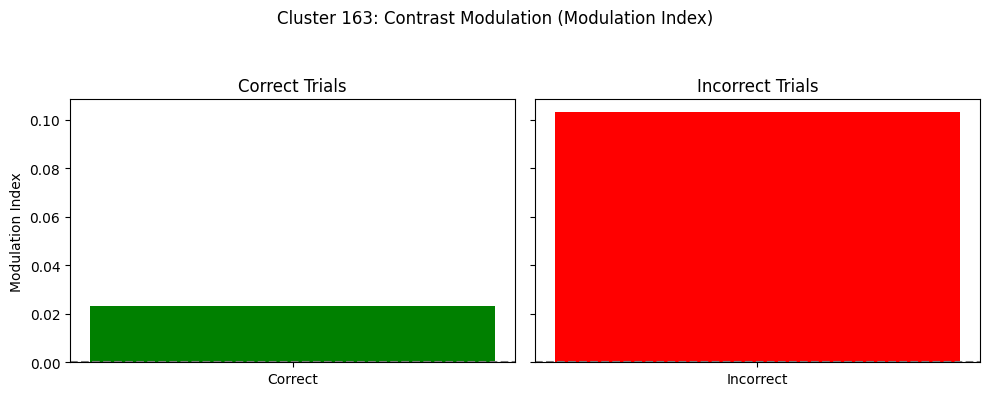

cluster #172


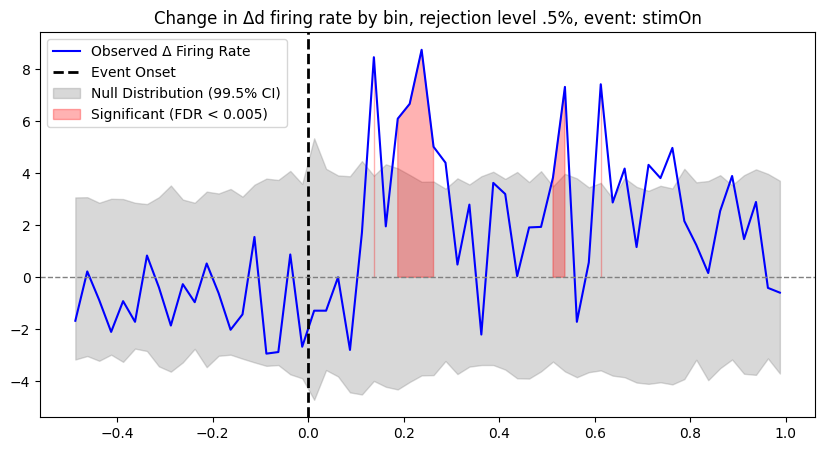

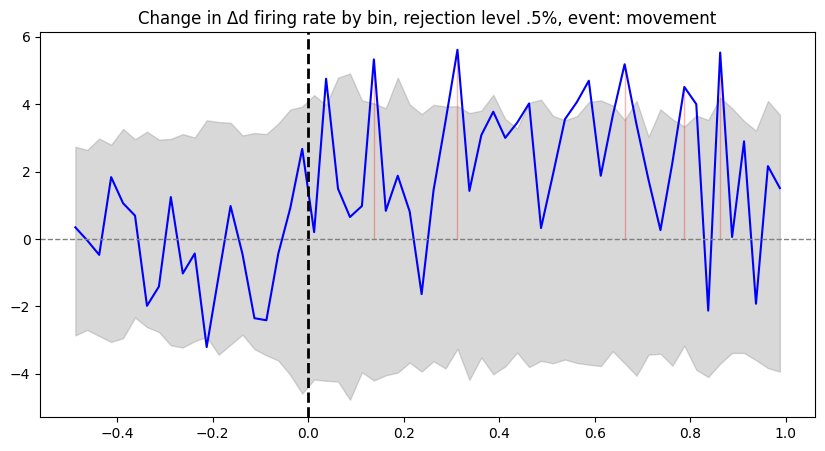

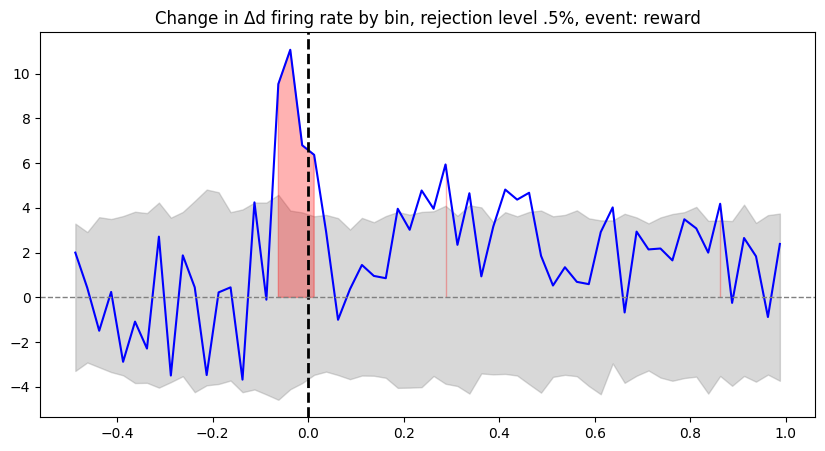

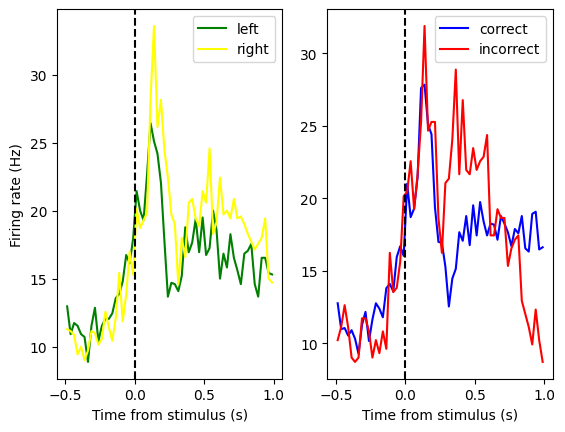

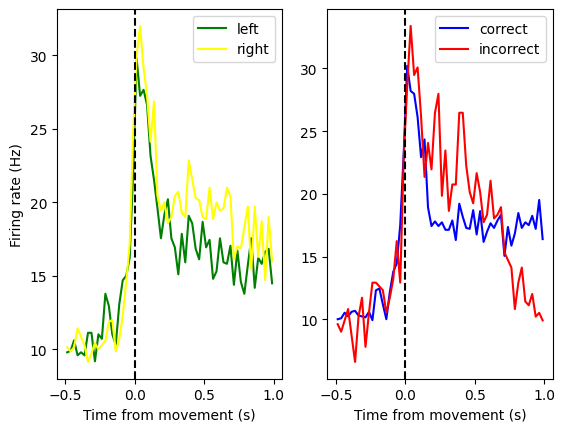

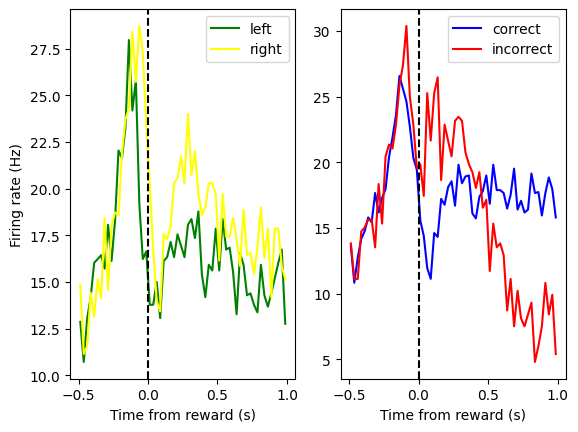

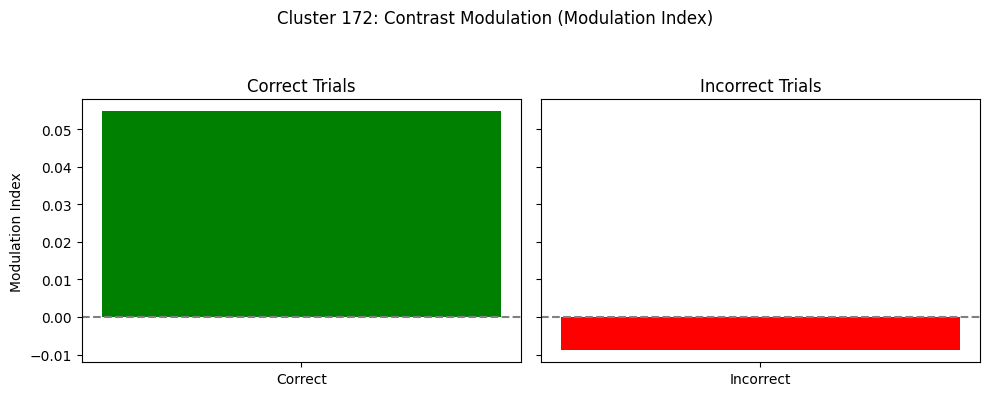

cluster #177


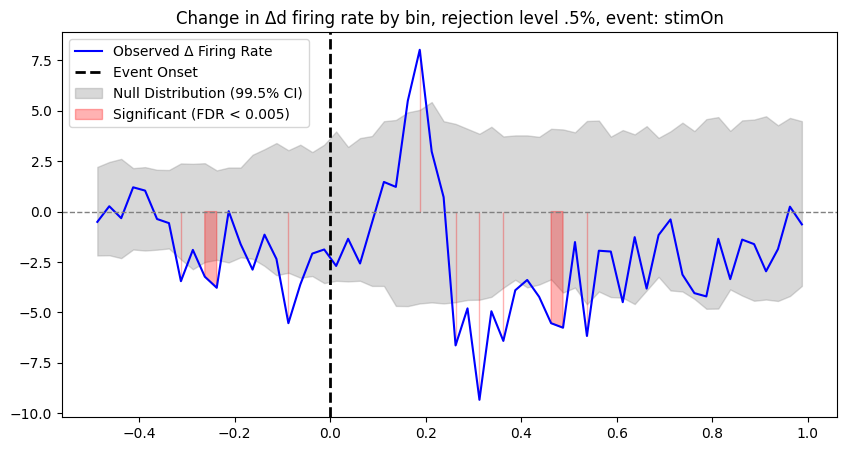

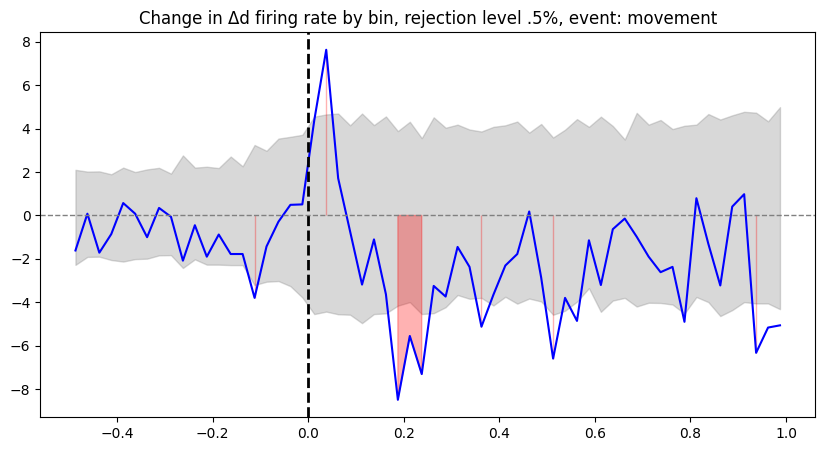

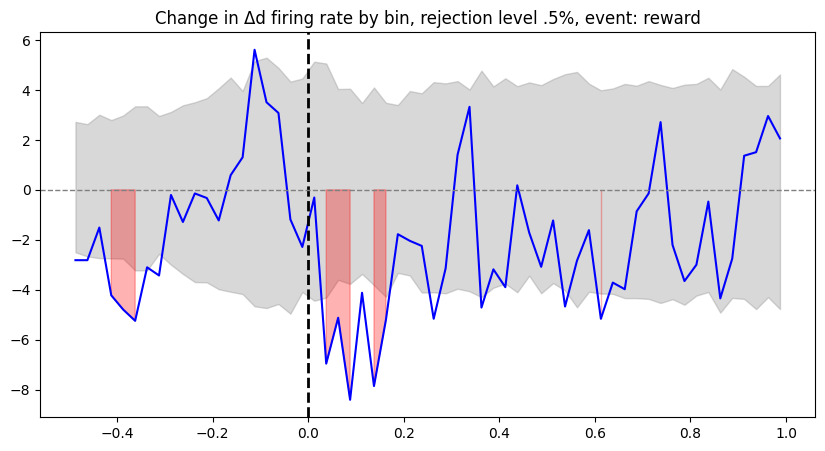

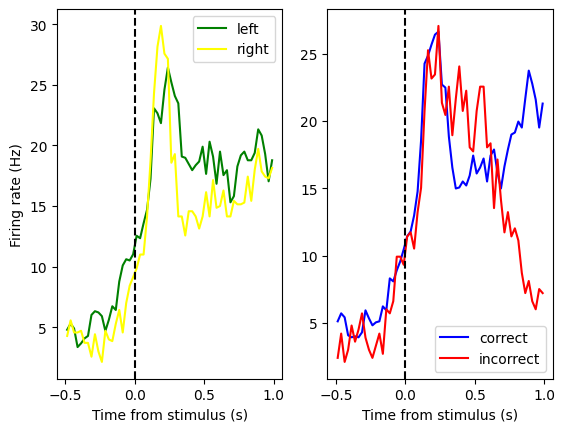

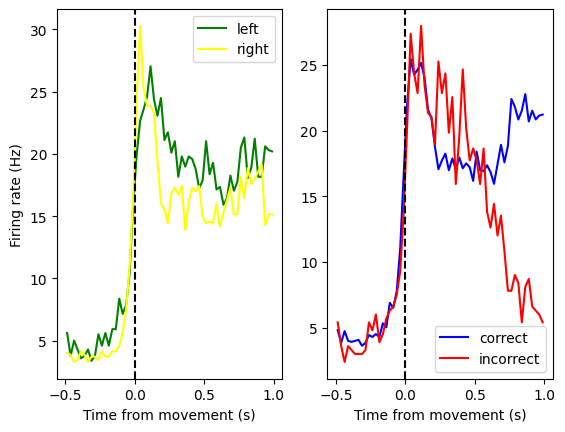

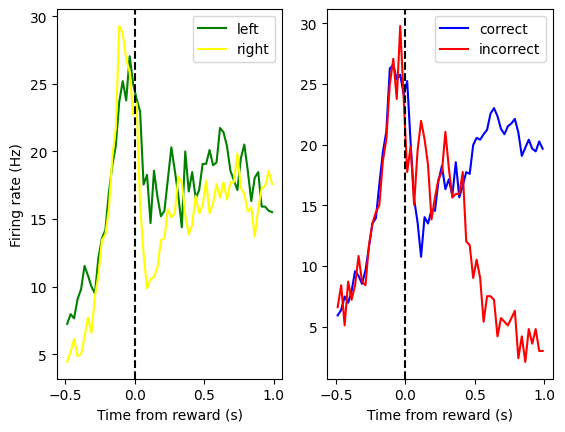

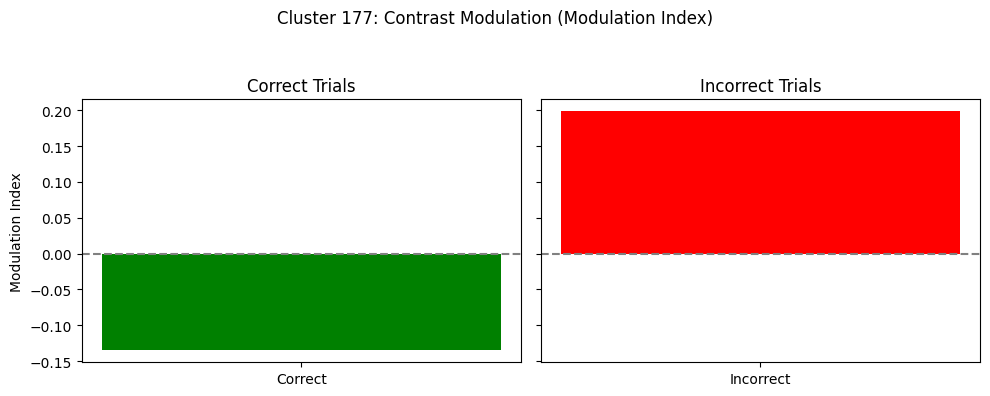

cluster #178


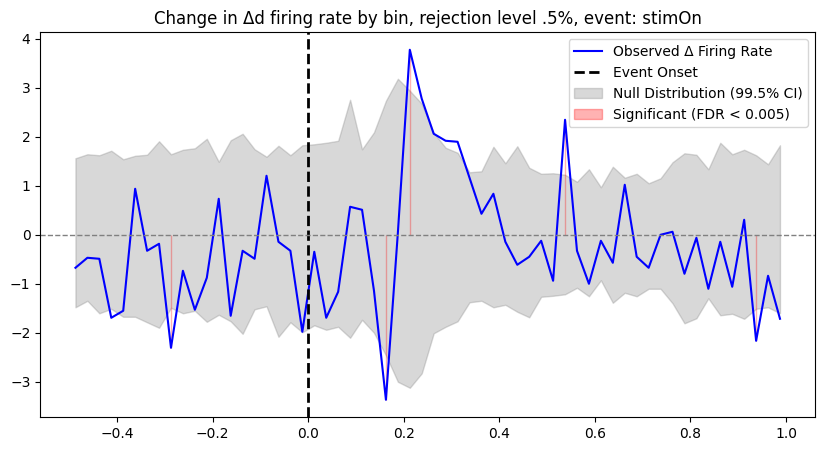

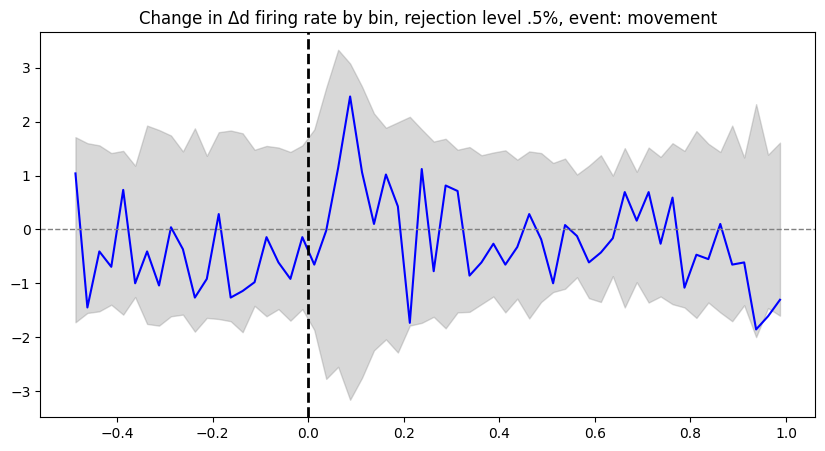

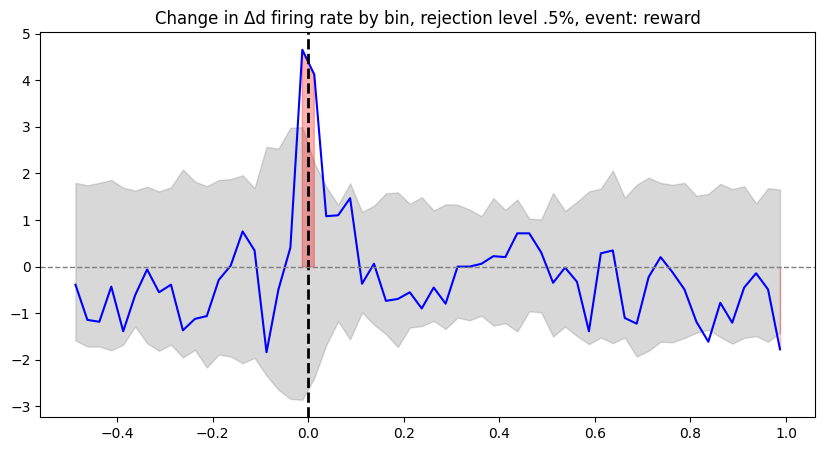

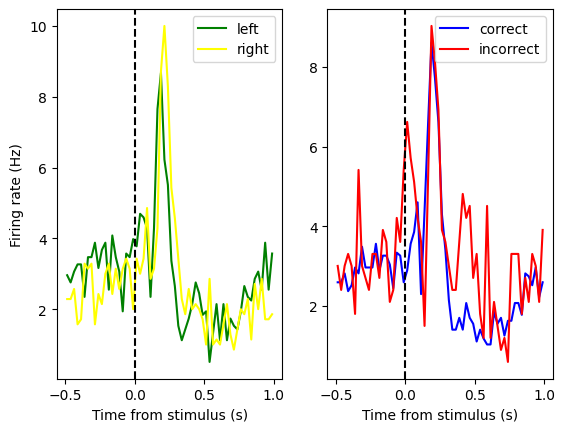

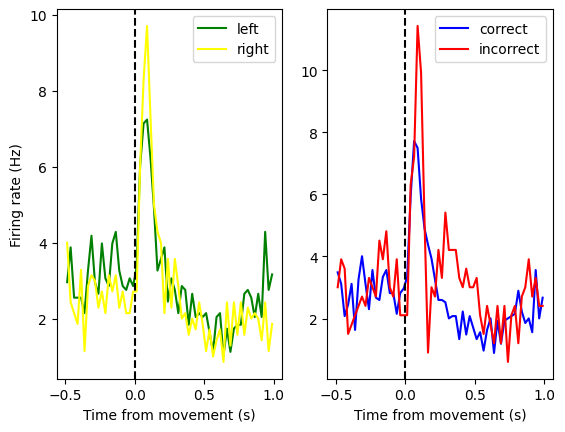

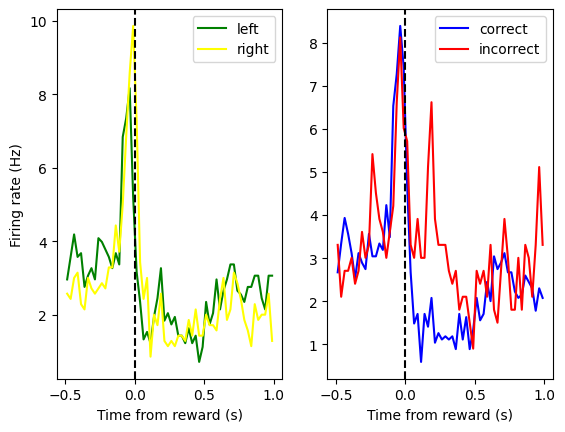

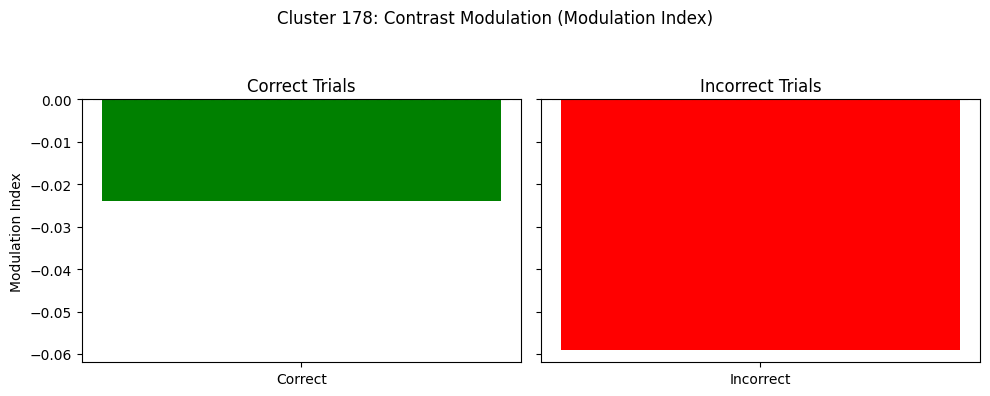

cluster #196


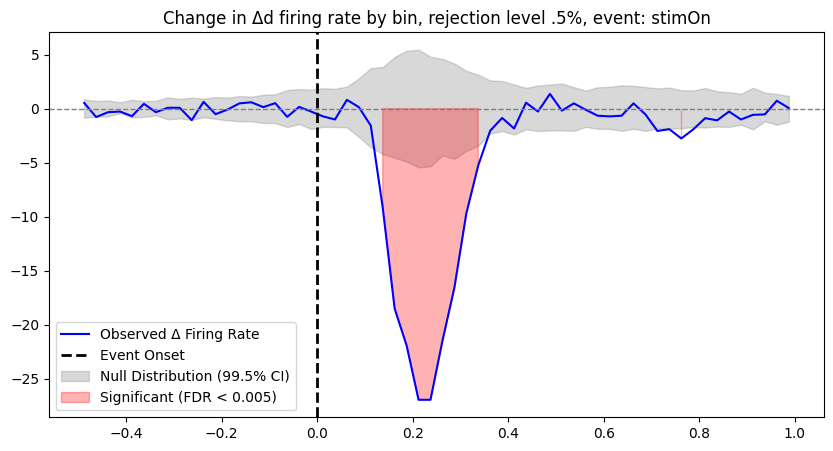

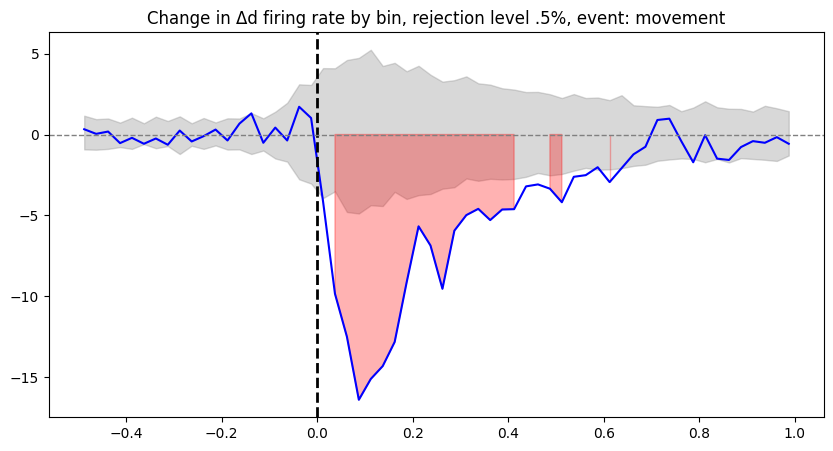

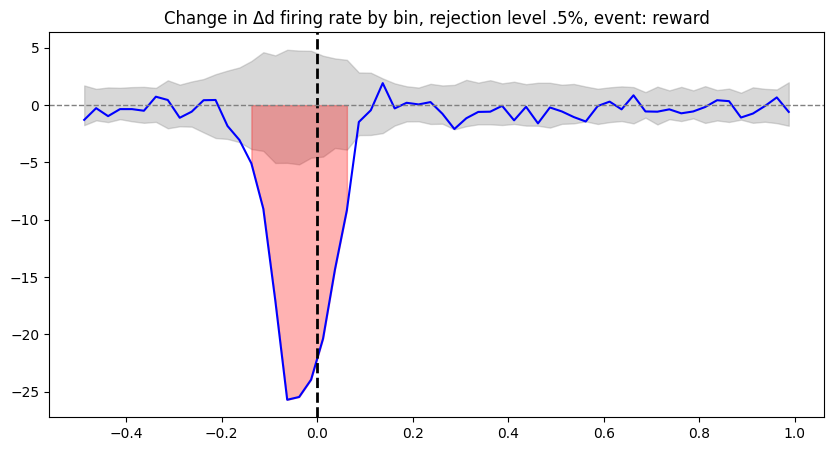

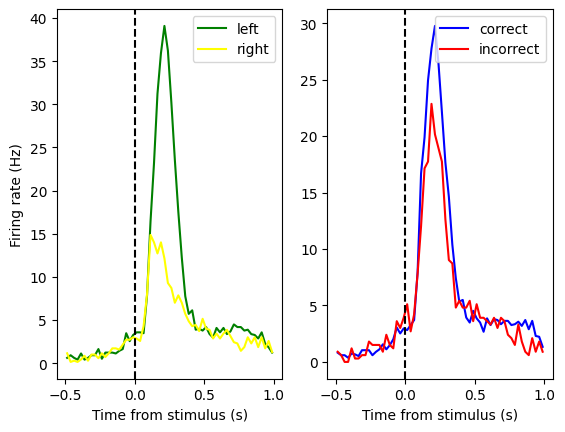

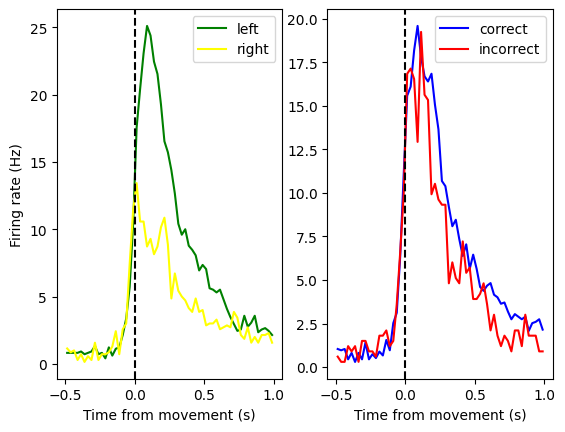

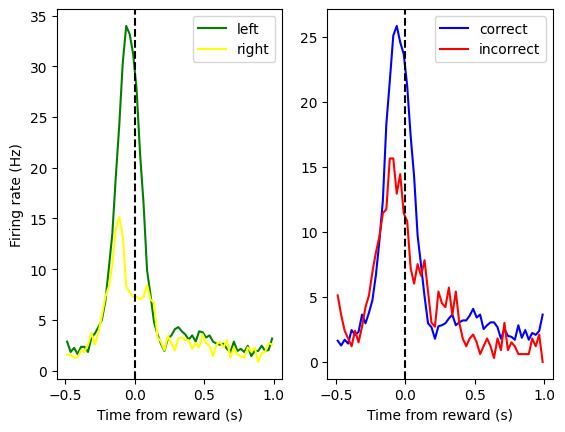

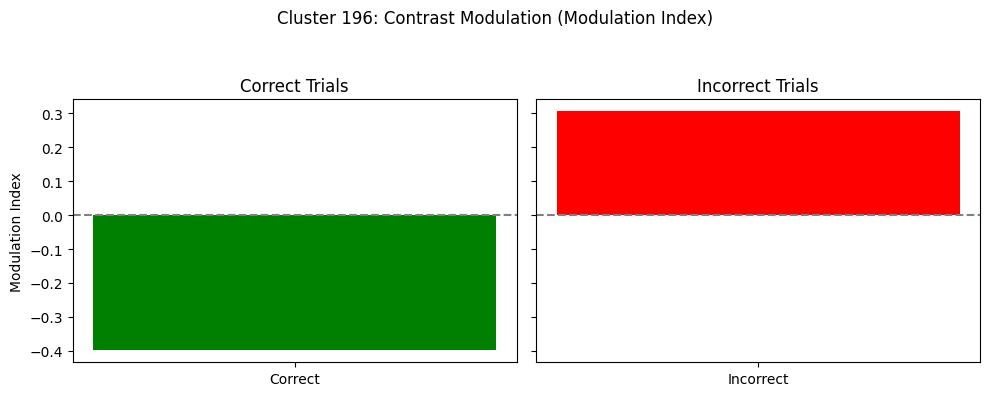

cluster #206


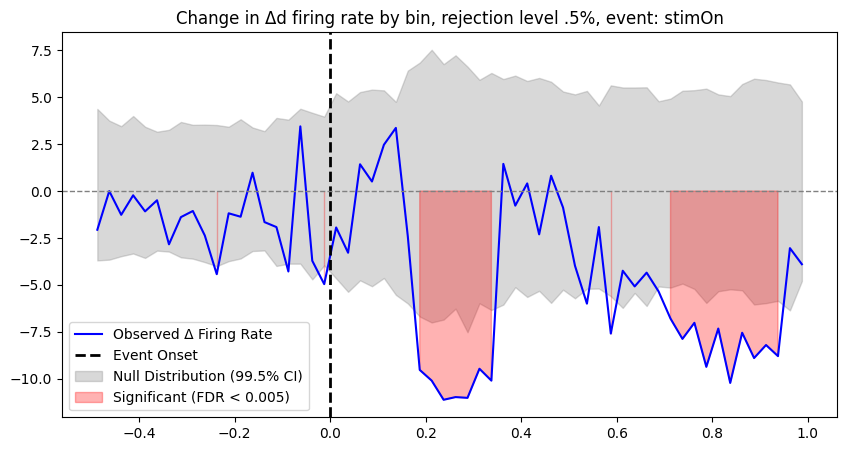

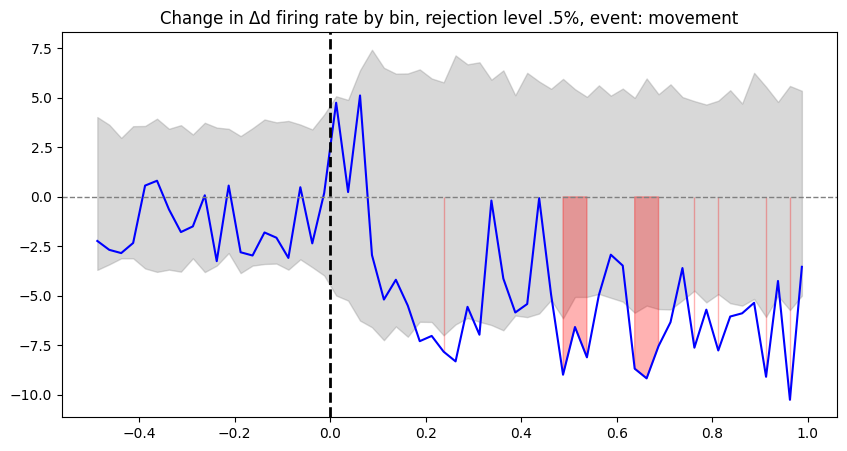

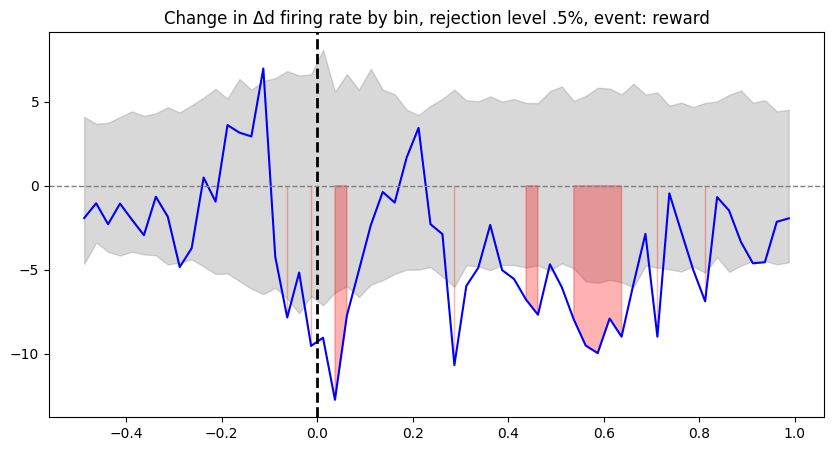

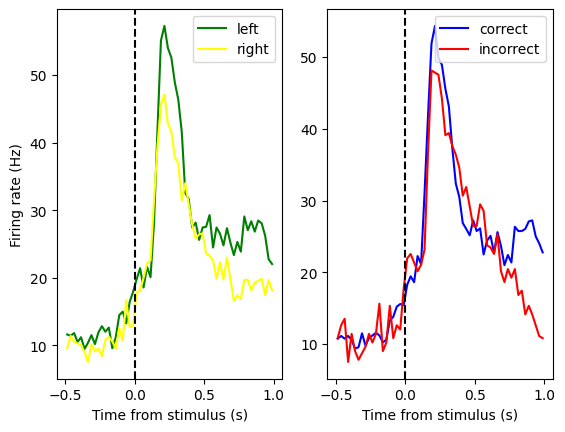

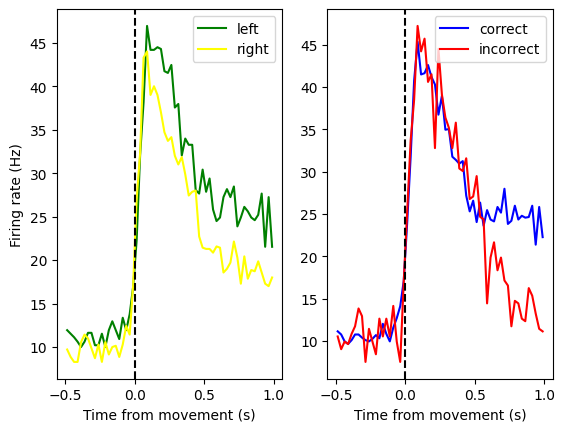

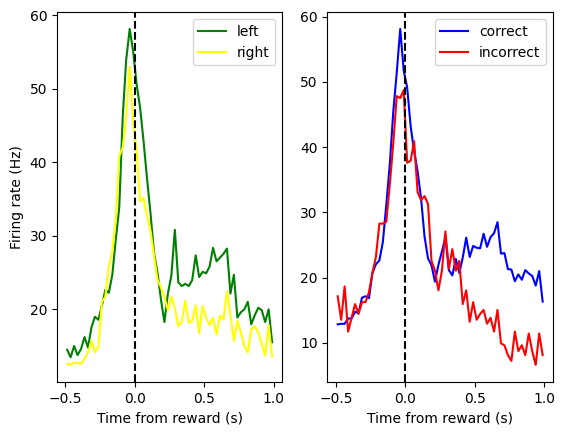

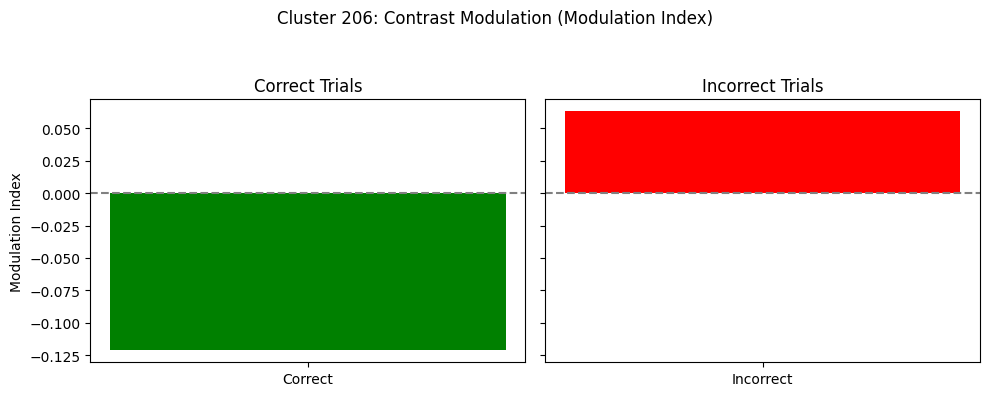

cluster #257


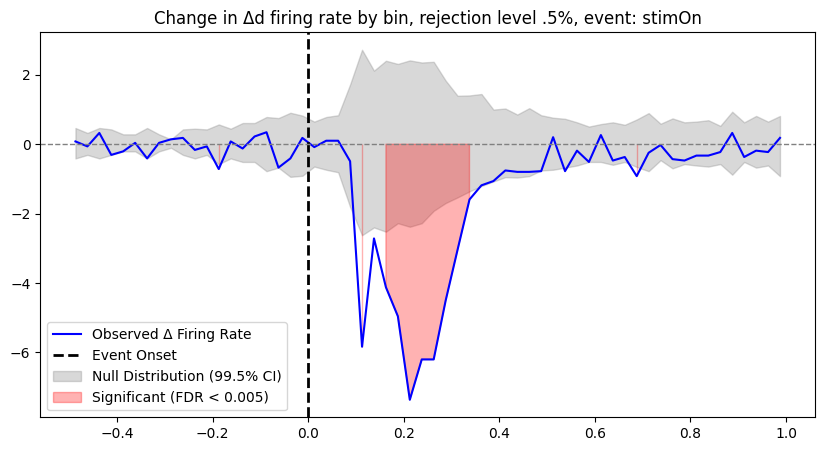

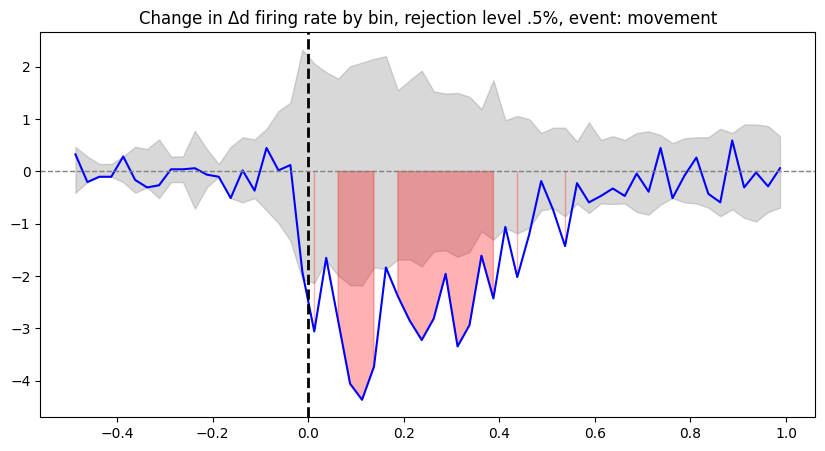

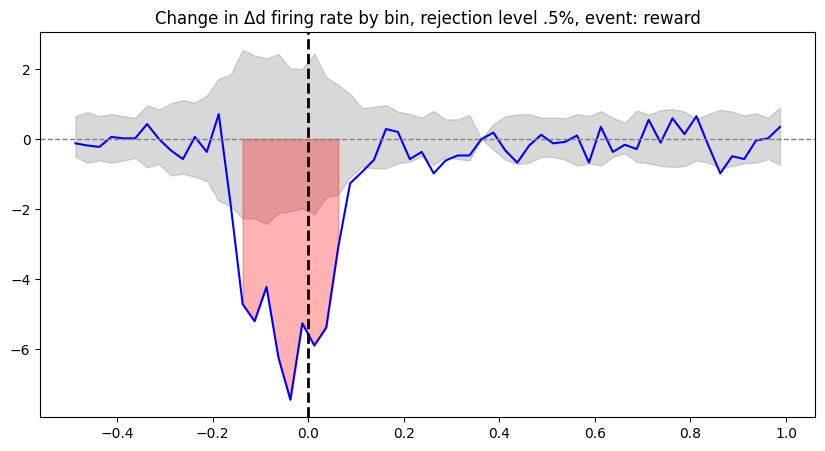

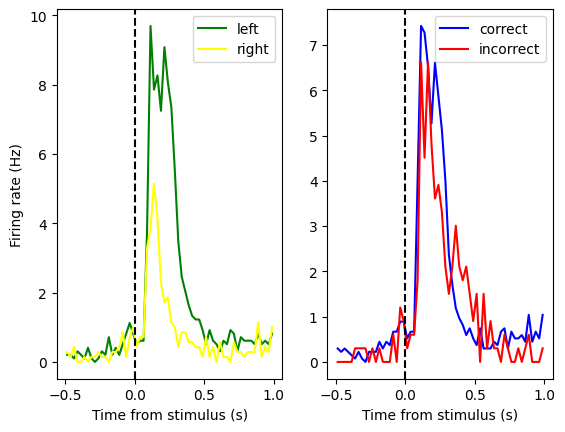

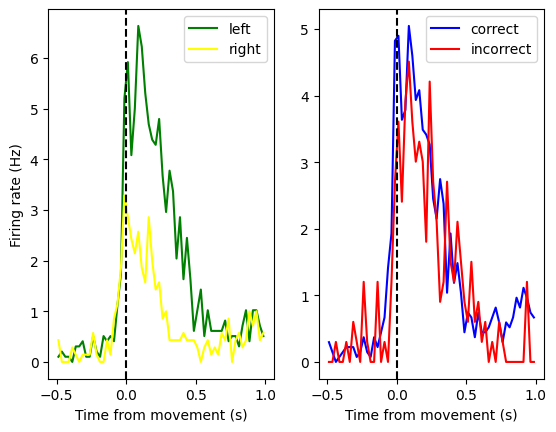

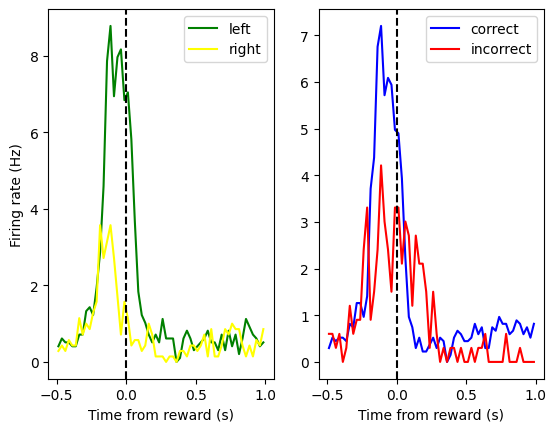

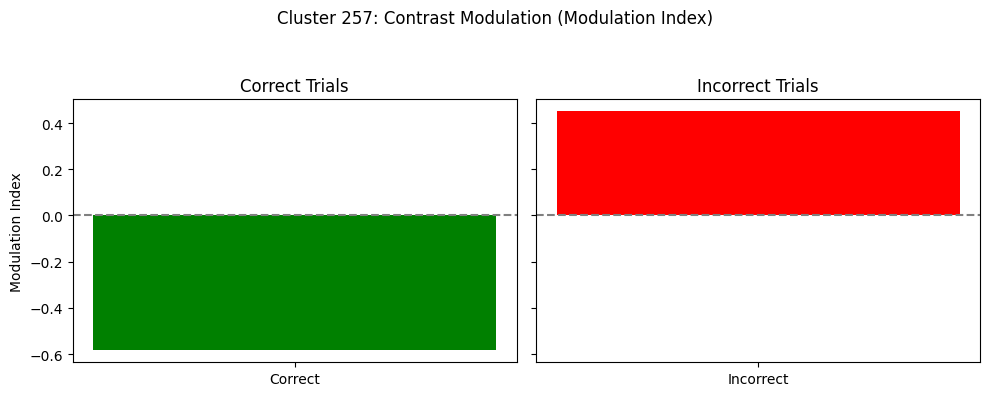

In [18]:
significant_stim_clusters = []
significant_movement_clusters = []
significant_reward_clusters = []
for cluster in cluster_ids:
    spikes_idx = (spikes['clusters'] == cluster)
    spike_times = spikes.times[spikes_idx]
    
    stim_spike_raster, stim_times = bin_spikes(spike_times, stimulus_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    stim_spike_raster = stim_spike_raster / bin_size

    move_spike_raster, move_times = bin_spikes(spike_times, movement_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    move_spike_raster = move_spike_raster / bin_size

    reward_spike_raster, reward_times = bin_spikes(spike_times, reward_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    reward_spike_raster = reward_spike_raster / bin_size

    print(f"cluster #{cluster}")
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on stimulus 
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(stim_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(stim_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    psth_correct = np.nanmean(stim_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(stim_spike_raster[incorrect_idx], axis=0)

#------permutation testing for stimOn event--------------------------------------------------------------------------------------------------------------

    n_shuffles = 1000  # Number of permutations
    
    # Initialize matrices for delta and shuffled deltas
    stim_d = np.zeros((stim_spike_raster.shape[1]))  # Observed delta
    stim_shuffled_d = np.zeros((n_shuffles, stim_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(stim_spike_raster.shape[1]):  # Loop over time bins
        stim_d[i] = np.nanmean(stim_spike_raster[right_idx, i]) - np.nanmean(stim_spike_raster[left_idx, i])
    
    # Compute shuffled distributions
    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)  # Shuffle trial labels
        for i in range(stim_spike_raster.shape[1]):
            stim_shuffled_d[shuff, i] = np.nanmean(stim_spike_raster[shuffled_right, i]) - np.nanmean(stim_spike_raster[shuffled_left, i])
    
    # Compute permutation p-values
    stim_p_values = np.mean(np.abs(stim_shuffled_d) >= np.abs(stim_d), axis=0)
    
    # Step 1: Apply Bonferroni correction
    alpha = 0.005  # Initial significance level
    bonferroni_threshold = alpha / stim_spike_raster.shape[1]  # Adjusted threshold
    
    # Find p-values passing Bonferroni correction
    stim_bonferroni_reject = stim_p_values < bonferroni_threshold
    
    # Step 2: Apply FDR Correction on Remaining P-values
    remaining_p_values = stim_p_values[stim_bonferroni_reject]
    
    if len(remaining_p_values) > 0:
        _, stim_p_fdr_corrected, _, _ = multipletests(remaining_p_values, alpha=alpha, method='fdr_bh')
        
        # Update the significance mask
        stim_final_reject = np.copy(stim_bonferroni_reject)
        stim_final_reject[stim_bonferroni_reject] = stim_p_fdr_corrected < alpha
    else:
        stim_final_reject = np.zeros_like(stim_p_values, dtype=bool)
    
    # Store significant clusters
    significant_stim_times = np.where(stim_final_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(stim_final_reject) > 5:
        significant_stim_clusters.append(cluster)
    
    # Find event time index (time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(stim_times))  
    
    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(stim_times, stim_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level .5%, event: stimOn")
    # Draw event onset line
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  

    # Compute null distribution percentiles for visualization
    lower_bound = np.percentile(stim_shuffled_d, 0.25, axis=0)  # 0.5% percentile (lower bound)
    upper_bound = np.percentile(stim_shuffled_d, 99.75, axis=0)  # 99.5% percentile (upper bound)
    
    # Plot the null distribution as a shaded region
    plt.fill_between(stim_times, lower_bound, upper_bound, color='gray', alpha=0.3, label="Null Distribution (99.5% CI)")
    # Highlight significant time bins
    plt.fill_between(stim_times, stim_d, where=stim_final_reject, color='red', alpha=0.3, label="Significant (FDR < 0.005)")
    
    plt.legend()
    plt.show()




 ##-------permutation testing for firstMove event------------------------------------------------------------------------------------------------------
    
    # Initialize matrices for delta and shuffled deltas
    movement_d = np.zeros((move_spike_raster.shape[1]))  # Observed delta
    shuffled_movement_d = np.zeros((n_shuffles, move_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(move_spike_raster.shape[1]):  # Loop over time bins
        movement_d[i] = np.nanmean(move_spike_raster[right_idx, i]) - np.nanmean(move_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(stim_spike_raster.shape[1]):
            shuffled_movement_d[shuff, i] = np.nanmean(move_spike_raster[shuffled_right, i]) - np.nanmean(move_spike_raster[shuffled_left, i])
    movement_p_values = np.mean(np.abs(shuffled_movement_d) >= np.abs(movement_d), axis=0)

    # Step 1: Apply Bonferroni correction
    alpha = 0.005  # Initial significance level
    bonferroni_threshold = alpha / move_spike_raster.shape[1]  # Adjusted threshold
    
    # Find p-values passing Bonferroni correction
    movement_bonferroni_reject = movement_p_values < bonferroni_threshold
    
    # Step 2: Apply FDR Correction on Remaining P-values
    remaining_p_values = movement_p_values[movement_bonferroni_reject]
    
    if len(remaining_p_values) > 0:
        _, movement_p_fdr_corrected, _, _ = multipletests(remaining_p_values, alpha=alpha, method='fdr_bh')
        
        # Update the significance mask
        movement_final_reject = np.copy(movement_bonferroni_reject)
        movement_final_reject[movement_bonferroni_reject] = movement_p_fdr_corrected < alpha
    else:
        movement_final_reject = np.zeros_like(movement_p_values, dtype=bool)
    
    # Store significant clusters
    significant_movement_times = np.where(movement_final_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(movement_final_reject) > 5:
        significant_movement_clusters.append(cluster)
        
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(move_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(move_times, movement_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level .5%, event: movement")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
    # Compute null distribution percentiles for visualization
    lower_bound = np.percentile(shuffled_movement_d, 0.25, axis=0)  
    upper_bound = np.percentile(shuffled_movement_d, 99.75, axis=0)  
    
    # Plot the null distribution as a shaded region
    plt.fill_between(move_times, lower_bound, upper_bound, color='gray', alpha=0.3, label="Null Distribution (99.5% CI)")
    # Highlight significant time bins only
    plt.fill_between(move_times, movement_d, where=movement_final_reject, color='red', alpha=0.3, label="Significant (FDR < 0.005)")
    
##-----------permutation testing for reward event------------------------------------------------------------------------------------------------------
    
    # Initialize matrices for delta and shuffled deltas
    reward_d = np.zeros((reward_spike_raster.shape[1]))  # Observed delta
    shuffled_reward_d = np.zeros((n_shuffles, reward_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(reward_spike_raster.shape[1]):  # Loop over time bins
        reward_d[i] = np.nanmean(reward_spike_raster[right_idx, i]) - np.nanmean(reward_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(reward_spike_raster.shape[1]):
            shuffled_reward_d[shuff, i] = np.nanmean(reward_spike_raster[shuffled_right, i]) - np.nanmean(reward_spike_raster[shuffled_left, i])
    reward_p_values = np.mean(np.abs(shuffled_reward_d) >= np.abs(reward_d), axis=0)

    # Step 1: Apply Bonferroni correction
    alpha = 0.005  # Initial significance level
    bonferroni_threshold = alpha / reward_spike_raster.shape[1]  # Adjusted threshold
    
    # Find p-values passing Bonferroni correction
    reward_bonferroni_reject = reward_p_values < bonferroni_threshold
    
    # Step 2: Apply FDR Correction on Remaining P-values
    remaining_p_values = reward_p_values[reward_bonferroni_reject]
    
    if len(remaining_p_values) > 0:
        _, reward_p_fdr_corrected, _, _ = multipletests(remaining_p_values, alpha=alpha, method='fdr_bh')
        
        # Update the significance mask
        reward_final_reject = np.copy(reward_bonferroni_reject)
        reward_final_reject[reward_bonferroni_reject] = reward_p_fdr_corrected < alpha
    else:
        reward_final_reject = np.zeros_like(reward_p_values, dtype=bool)
    
    significant_reward_times = np.where(reward_final_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(reward_final_reject) > 5:
        significant_reward_clusters.append(cluster)
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(reward_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(reward_times, reward_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level .5%, event: reward")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
     # Compute null distribution percentiles for visualization
    lower_bound = np.percentile(shuffled_reward_d, 0.25, axis=0)  # 2.5% percentile (lower bound)
    upper_bound = np.percentile(shuffled_reward_d, 99.75, axis=0)  # 97.5% percentile (upper bound)
    
    # Plot the null distribution as a shaded region
    plt.fill_between(reward_times, lower_bound, upper_bound, color='gray', alpha=0.3, label="Null Distribution (99.5% CI)")
    # Highlight significant time bins only
    # Highlight significant time bins only
    plt.fill_between(reward_times, reward_d, where=reward_final_reject, color='red', alpha=0.3, label="Significant (FDR < 0.005)")
 ##-----sub-graphs----------------------------------------------------------------------------------------------------------------------------------------   
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(stim_times, psth_left, c='green')
    axs[0].plot(stim_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from stimulus (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(stim_times, psth_correct, c='blue')
    axs[1].plot(stim_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from stimulus (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on movement
    psth_left = np.nanmean(move_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(move_spike_raster[right_idx], axis=0)
    psth_correct = np.nanmean(move_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(move_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(move_times, psth_left, c='green')
    axs[0].plot(move_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from movement (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(move_times, psth_correct, c='blue')
    axs[1].plot(move_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from movement (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on reward
    psth_left = np.nanmean(reward_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(reward_spike_raster[right_idx], axis=0)
    psth_correct = np.nanmean(reward_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(reward_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(reward_times, psth_left, c='green')
    axs[0].plot(reward_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from reward (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(reward_times, psth_correct, c='blue')
    axs[1].plot(reward_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from reward (s)')

    plt.show()


      # --- Correct Trials ---
    # Intersect contrast indices with correct trials:
    left_correct_idx = left_idx & correct_idx
    right_correct_idx = right_idx & correct_idx
    
    # Compute the average firing rates over the entire stimulus period (or a chosen time window)
    avg_fr_left_correct = np.nanmean(stim_spike_raster[left_correct_idx])
    avg_fr_right_correct = np.nanmean(stim_spike_raster[right_correct_idx])
    
    # Calculate the modulation index for correct trials
    # (Handle division by zero if both rates sum to zero)
    if (avg_fr_right_correct + avg_fr_left_correct) != 0:
        modulation_index_correct = (avg_fr_right_correct - avg_fr_left_correct) / (avg_fr_right_correct + avg_fr_left_correct)
    else:
        modulation_index_correct = 0
    
    # --- Incorrect Trials ---
    # Intersect contrast indices with incorrect trials:
    left_incorrect_idx = left_idx & incorrect_idx
    right_incorrect_idx = right_idx & incorrect_idx
    
    avg_fr_left_incorrect = np.nanmean(stim_spike_raster[left_incorrect_idx])
    avg_fr_right_incorrect = np.nanmean(stim_spike_raster[right_incorrect_idx])
    
    if (avg_fr_right_incorrect + avg_fr_left_incorrect) != 0:
        modulation_index_incorrect = (avg_fr_right_incorrect - avg_fr_left_incorrect) / (avg_fr_right_incorrect + avg_fr_left_incorrect)
    else:
        modulation_index_incorrect = 0
    
    # --- Plotting ---
    # Create a figure with two subplots (one for correct, one for incorrect)
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    
    # Plot for correct trials
    axs[0].bar(0, modulation_index_correct, width=0.5, color='green')
    axs[0].set_title("Correct Trials")
    axs[0].set_xticks([0])
    axs[0].set_xticklabels(["Correct"])
    axs[0].axhline(0, color='gray', linestyle='--')
    axs[0].set_ylabel("Modulation Index")
    
    # Plot for incorrect trials
    axs[1].bar(0, modulation_index_incorrect, width=0.5, color='red')
    axs[1].set_title("Incorrect Trials")
    axs[1].set_xticks([0])
    axs[1].set_xticklabels(["Incorrect"])
    axs[1].axhline(0, color='gray', linestyle='--')
    
    # Overall figure title
    plt.suptitle(f"Cluster {cluster}: Contrast Modulation (Modulation Index)")
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

In [19]:
significant_stim_clusters, significant_movement_clusters, significant_reward_clusters

([np.int64(11),
  np.int64(163),
  np.int64(172),
  np.int64(177),
  np.int64(196),
  np.int64(206),
  np.int64(257)],
 [np.int64(11), np.int64(177), np.int64(196), np.int64(206), np.int64(257)],
 [np.int64(11),
  np.int64(163),
  np.int64(172),
  np.int64(177),
  np.int64(196),
  np.int64(206),
  np.int64(257)])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.multitest import multipletests

# ----------------------------------------------------------------------------
# Helper Functions (exactly as in the original)
# ----------------------------------------------------------------------------

def compute_spike_raster(spike_times, events, pre_time, post_time, bin_size):
    """
    Bins spike times relative to events and converts counts to firing rates.
    (Exactly the same as in the original code.)
    """
    spike_raster, times = bin_spikes(spike_times, events, pre_time=pre_time, 
                                     post_time=post_time, bin_size=bin_size)
    spike_raster = spike_raster / bin_size
    return spike_raster, times

def process_event(spike_raster, times, left_idx, right_idx, n_shuffles, alpha, event_label):
    """
    Performs the permutation test for one event (stimOn, movement, or reward)
    exactly as in the original code.
    
    Parameters:
      - spike_raster: binned firing rates (2D array)
      - times: corresponding time bins
      - left_idx, right_idx: boolean arrays for left/right trial indices
      - n_shuffles: number of shuffles for the permutation test
      - alpha: significance level (e.g. 0.005)
      - event_label: string label used in the plot title
      
    Returns:
      - delta: observed difference (right minus left) per bin
      - final_reject: boolean mask of bins significant after corrections
      - shuffled_delta: the null distribution (2D array)
      - p_values: permutation p-values (1D array)
    """
    num_bins = spike_raster.shape[1]
    delta = np.zeros(num_bins)
    shuffled_delta = np.zeros((n_shuffles, num_bins))
    
    # Compute observed delta (exactly as in the original)
    for i in range(num_bins):
        delta[i] = np.nanmean(spike_raster[right_idx, i]) - np.nanmean(spike_raster[left_idx, i])
    
    # Compute shuffled distribution
    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx)
        shuffled_right = np.random.permutation(right_idx)
        for i in range(num_bins):
            shuffled_delta[shuff, i] = np.nanmean(spike_raster[shuffled_right, i]) - np.nanmean(spike_raster[shuffled_left, i])
    
    # Compute permutation p-values
    p_values = np.mean(np.abs(shuffled_delta) >= np.abs(delta), axis=0)
    
    # Step 1: Bonferroni correction
    bonferroni_threshold = alpha / num_bins
    bonf_reject = p_values < bonferroni_threshold
    
    # Step 2: FDR correction on remaining p-values
    remaining_p = p_values[bonf_reject]
    if len(remaining_p) > 0:
        _, p_fdr_corrected, _, _ = multipletests(remaining_p, alpha=alpha, method='fdr_bh')
        final_reject = np.copy(bonf_reject)
        final_reject[bonf_reject] = p_fdr_corrected < alpha
    else:
        final_reject = np.zeros_like(p_values, dtype=bool)
    
    # Plot exactly as in the original code:
    plt.figure(figsize=(10, 5))
    plt.plot(times, delta, label="Observed Δ Firing Rate", color='blue')
    plt.title(f"Change in Δd firing rate by bin, rejection level 0.5%, event: {event_label}")
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    
    lower_bound = np.percentile(shuffled_delta, 0.25, axis=0)
    upper_bound = np.percentile(shuffled_delta, 99.75, axis=0)
    plt.fill_between(times, lower_bound, upper_bound, color='gray', alpha=0.3, 
                     label="Null Distribution (99.5% CI)")
    plt.fill_between(times, delta, where=final_reject, color='red', alpha=0.3,
                     label="Significant (FDR < 0.005)")
    plt.legend()
    plt.show()
    
    return delta, final_reject, shuffled_delta, p_values

def plot_psth_subgraphs(times, psth_left, psth_right, psth_correct, psth_incorrect, event_label, xlabel):
    """
    Plots PSTHs (left/right and correct/incorrect) exactly as in the original.
    """
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(times, psth_left, c='green')
    axs[0].plot(times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(times, psth_correct, c='blue')
    axs[1].plot(times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel(xlabel)
    
    plt.show()

def plot_contrast_bar_graphs(stim_spike_raster, trials, correct_idx, incorrect_idx):
    """
    Plots the contrast bar graphs exactly as in the original code.
    """
    contrast_levels_left = np.unique(trials['contrastLeft'][~np.isnan(trials['contrastLeft'])])
    contrast_levels_right = np.unique(trials['contrastRight'][~np.isnan(trials['contrastRight'])])
    
    firing_rates_correct_left = []
    firing_rates_incorrect_left = []
    firing_rates_correct_right = []
    firing_rates_incorrect_right = []
    
    for contrast in contrast_levels_left:
        idx = trials['contrastLeft'] == contrast
        firing_rates_correct_left.append(np.nanmean(stim_spike_raster[idx & correct_idx]))
        firing_rates_incorrect_left.append(np.nanmean(stim_spike_raster[idx & incorrect_idx]))
    
    for contrast in contrast_levels_right:
        idx = trials['contrastRight'] == contrast
        firing_rates_correct_right.append(np.nanmean(stim_spike_raster[idx & correct_idx]))
        firing_rates_incorrect_right.append(np.nanmean(stim_spike_raster[idx & incorrect_idx]))
    
    contrast_labels_left = [str(c) for c in contrast_levels_left]
    contrast_labels_right = [str(c) for c in contrast_levels_right]
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    x_left = np.arange(len(contrast_levels_left))
    axs[0].bar(x_left - 0.2, firing_rates_correct_left, width=0.4, label='Correct', color='blue')
    axs[0].bar(x_left + 0.2, firing_rates_incorrect_left, width=0.4, label='Incorrect', color='red')
    axs[0].set_xticks(x_left)
    axs[0].set_xticklabels(contrast_labels_left)
    axs[0].set_xlabel('Contrast Left')
    axs[0].set_ylabel('Firing Rate (Hz)')
    axs[0].set_title('Firing Rate by Contrast Left')
    axs[0].legend()
    
    x_right = np.arange(len(contrast_levels_right))
    axs[1].bar(x_right - 0.2, firing_rates_correct_right, width=0.4, label='Correct', color='green')
    axs[1].bar(x_right + 0.2, firing_rates_incorrect_right, width=0.4, label='Incorrect', color='orange')
    axs[1].set_xticks(x_right)
    axs[1].set_xticklabels(contrast_labels_right)
    axs[1].set_xlabel('Contrast Right')
    axs[1].set_ylabel('Firing Rate (Hz)')
    axs[1].set_title('Firing Rate by Contrast Right')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()

# ----------------------------------------------------------------------------
# Main Analysis Function (exactly as in the original)
# ----------------------------------------------------------------------------

def run_build_script(cluster_ids, spikes, stimulus_events, movement_events, reward_events,
                     pre_time, post_time, bin_size, sl, n_shuffles=1000, alpha=0.005):
    """
    Processes each cluster exactly as in the original code.
    
    For each cluster:
      - Compute spike rasters for stimulus, movement, and reward events.
      - Calculate PSTHs (left/right and correct/incorrect) for stimulus events.
      - Perform permutation tests for stimOn, movement, and reward events.
      - Plot the results.
      - Plot PSTH subgraphs and contrast bar graphs.
      
    Returns lists of significant clusters for each event type.
    """
    significant_stim_clusters = []
    significant_movement_clusters = []
    significant_reward_clusters = []
    
    for cluster in cluster_ids:
        # Get spike times for this cluster
        spikes_idx = (spikes['clusters'] == cluster)
        spike_times = spikes.times[spikes_idx]
        print(f"Processing cluster #{cluster}")
        
        # Compute spike rasters for each event
        stim_spike_raster, stim_times = compute_spike_raster(spike_times, stimulus_events, pre_time, post_time, bin_size)
        move_spike_raster, move_times = compute_spike_raster(spike_times, movement_events, pre_time, post_time, bin_size)
        reward_spike_raster, reward_times = compute_spike_raster(spike_times, reward_events, pre_time, post_time, bin_size)
        
        # Determine indices for left/right and correct/incorrect trials (unchanged)
        left_idx = ~np.isnan(sl.trials['contrastLeft'])
        right_idx = ~np.isnan(sl.trials['contrastRight'])
        correct_idx = sl.trials['feedbackType'] == 1
        incorrect_idx = sl.trials['feedbackType'] == -1
        
        # Compute PSTHs for stimulus events
        psth_left = np.nanmean(stim_spike_raster[left_idx], axis=0)
        psth_right = np.nanmean(stim_spike_raster[right_idx], axis=0)
        psth_correct = np.nanmean(stim_spike_raster[correct_idx], axis=0)
        psth_incorrect = np.nanmean(stim_spike_raster[incorrect_idx], axis=0)
        
        # Permutation testing for stimOn event
        stim_delta, stim_final, stim_shuffled, _ = process_event(
            stim_spike_raster, stim_times, left_idx, right_idx, n_shuffles, alpha, "stimOn")
        if np.count_nonzero(stim_final) > 5:
            significant_stim_clusters.append(cluster)
        
        # Permutation testing for movement event
        move_delta, move_final, move_shuffled, _ = process_event(
            move_spike_raster, move_times, left_idx, right_idx, n_shuffles, alpha, "movement")
        if np.count_nonzero(move_final) > 5:
            significant_movement_clusters.append(cluster)
        
        # Permutation testing for reward event
        reward_delta, reward_final, reward_shuffled, _ = process_event(
            reward_spike_raster, reward_times, left_idx, right_idx, n_shuffles, alpha, "reward")
        if np.count_nonzero(reward_final) > 5:
            significant_reward_clusters.append(cluster)
        
        # Plot PSTH subgraphs (exactly as in the original)
        plot_psth_subgraphs(stim_times, psth_left, psth_right, psth_correct, psth_incorrect, "stimOn", "Time from stimulus (s)")
        
        psth_left_move = np.nanmean(move_spike_raster[left_idx], axis=0)
        psth_right_move = np.nanmean(move_spike_raster[right_idx], axis=0)
        psth_correct_move = np.nanmean(move_spike_raster[correct_idx], axis=0)
        psth_incorrect_move = np.nanmean(move_spike_raster[incorrect_idx], axis=0)
        plot_psth_subgraphs(move_times, psth_left_move, psth_right_move, psth_correct_move, psth_incorrect_move, "movement", "Time from movement (s)")
        
        psth_left_reward = np.nanmean(reward_spike_raster[left_idx], axis=0)
        psth_right_reward = np.nanmean(reward_spike_raster[right_idx], axis=0)
        psth_correct_reward = np.nanmean(reward_spike_raster[correct_idx], axis=0)
        psth_incorrect_reward = np.nanmean(reward_spike_raster[incorrect_idx], axis=0)
        plot_psth_subgraphs(reward_times, psth_left_reward, psth_right_reward, psth_correct_reward, psth_incorrect_reward, "reward", "Time from reward (s)")
        
        # Plot contrast bar graphs using the stimulus event raster
        plot_contrast_bar_graphs(stim_spike_raster, sl.trials, correct_idx, incorrect_idx)
    
    return significant_stim_clusters, significant_movement_clusters, significant_reward_clusters

# ----------------------------------------------------------------------------
# Main Build Script (exactly as in the original multi-session code)
# ----------------------------------------------------------------------------

if __name__ == '__main__':
    # Handpicked sessions from various brain regions.
    sessions_with_regions = one.search_insertions(atlas_acronym=['STR', 'MO'], project='brainwide')
    for session in sessions_with_regions:
        print(session)
    
    # Define the PID matrix for the selected regions.
    pid_matrix = pd.DataFrame(columns=[
        'Primary Motor Cortex (MOp)', 
        'Secondary Motor Cortex (MOs)', 
        'Superior Collicilus (SC)', 
        'Striatum (STR)'
    ])
    
    pid_matrix['Primary Motor Cortex (MOp)'] = [
        '73ff4936-8cd3-4a75-a772-f563e67d249d', 'f475ae14-9415-453e-b800-1480ea1c868d', 
        '7b05cccc-44f6-4491-a0ea-e38d6e95513d', 'decc8d40-cf74-4263-ae9d-a0cc68b47e86',
        '2564dc27-4eda-4fc3-a151-c13475796ee1', 'df07180e-268e-489c-826e-40cb6f63d3a5',
        '2d2cdf86-4a0c-42d8-aed3-5b187f160013', '79628a45-c2e3-4206-97df-4c91edaff90f',
        '7bd5627e-b02e-47f1-b476-4bf8eaa726b3', '3bd1f88b-4e0c-43a6-9483-3305e82f2fae'
    ]
    
    pid_matrix['Secondary Motor Cortex (MOs)'] = [
        '298e2a70-9801-45f0-b91c-d6bb9718427e', '99993a2b-588e-4c0c-bfec-e3dfb4f61534',
        '450cea3b-9289-4708-9df2-a2518bdc4b59', '2564dc27-4eda-4fc3-a151-c13475796ee1',
        'ae2b9f1b-ebe3-4b56-8957-31982186e6ec', '5458cb27-d065-4626-bcd8-1aa775e1115e',
        '26af22bb-b295-4a45-8ed3-1700604c0708', '45e7731f-4a43-45d5-9029-c080150bc596',
        '898f8971-31e9-4fdb-b66e-2ae6d3a33a5b', 'c1014051-d06b-4f85-9887-e7c42a94baf2'
    ]
    
    pid_matrix['Superior Collicilus (SC)'] = [
        'c893c0a3-5597-49cf-baa1-60efdfdef542', 'b7c57ce1-a75b-410a-94b6-8abee5a92c4f',
        'e7080659-8319-48a6-b6fd-2e8ce8eeec49', 'fe41986d-4966-4a77-af7e-e7f71c25aec5',
        '00a824c0-e060-495f-9ebc-79c82fef4c67', '7791ee46-5c13-4d1b-8518-5602dcb8666b',
        '53ecbf4f-e0d8-4fe6-a852-8b934a37a1c2', '9150758e-1390-41d1-b426-96675e60dbea',
        'ca5404f7-297c-40f1-bbf0-5ac0a63e24f8', 'e4ce2e94-6fb9-4afe-acbf-6f5a3498602e'
    ]
    
    pid_matrix['Striatum (STR)'] = [
        '73ff4936-8cd3-4a75-a772-f563e67d249d', 'f475ae14-9415-453e-b800-1480ea1c868d',
        'c4b5a9fa-10cb-4195-9c17-15b6a1f77f9a', '45c49ba2-a113-4446-9c6d-9b049c1f9f74',
        'fd555d39-b728-44aa-90d2-796b8bb58300', '45e7731f-4a43-45d5-9029-c080150bc596',
        '6a22a5b4-79ec-4b3c-b023-1ec7b4a2b675', 'adca9242-0725-41d4-8eb1-5655a464431d',
        '19c9caea-2df8-4097-92f8-0a2bad055948', 'd3deaed9-34b7-41da-bd62-961750cb9ca0'
    ]
    
    # Dictionary to store results per region.
    results_by_region = {}
    
    # Loop through each region in the PID matrix.
    for region_name in pid_matrix.columns:
        # Extract the region acronym from the column header
        region_acronym = region_name.split('(')[-1].split(')')[0]
        print(f"Processing region: {region_name} (acronym: {region_acronym})")
        
        # Select the first three sessions for this region.
        pids = pid_matrix[region_name].dropna().tolist()[:3]
        region_results = {}
        
        for pid in pids:
            # Load session and spike sorting data.
            eid, _ = one.pid2eid(pid)
            sl = SessionLoader(eid=eid, one=one)
            sl.load_trials()
            ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
            spikes, clusters, channels = ssl.load_spike_sorting()
            clusters = ssl.merge_clusters(spikes, clusters, channels)
            
            # Binning parameters
            bin_size = 0.1
            pre_time = 2
            post_time = 3
            
            stimulus_events = np.array(sl.trials['stimOn_times'])
            movement_events = np.array(sl.trials['firstMovement_times'])
            reward_events = np.array(sl.trials['feedback_times'])
            
            # Filter clusters by region (same criteria as the original)
            session_region_acronym = clusters['acronym'].astype(str)
            cluster_ids = np.where((clusters['label'] == 1) &
                                   np.char.startswith(session_region_acronym, region_acronym))[0]
            print(f"Session {pid} clusters: {cluster_ids}")
            
            sig_stim, sig_move, sig_reward = run_build_script(
                cluster_ids, spikes, stimulus_events, movement_events, reward_events,
                pre_time, post_time, bin_size, sl, n_shuffles=1000, alpha=0.005
            )
            region_results[pid] = {
                'sig_stim': sig_stim,
                'sig_move': sig_move,
                'sig_reward': sig_reward
            }
        results_by_region[region_name] = region_results
    
    print("Final Results:")
    print(results_by_region)
